!pip install gdown
!pip install tensorflow

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [5]:
df = pd.read_csv(
  "london_merged.csv", 
  parse_dates=['timestamp'], 
  index_col="timestamp"
)

In [6]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [7]:
df.shape

(17414, 9)

In [8]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [9]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [10]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1


In [16]:
#cnt = count # per hour 8k of bikes are shared

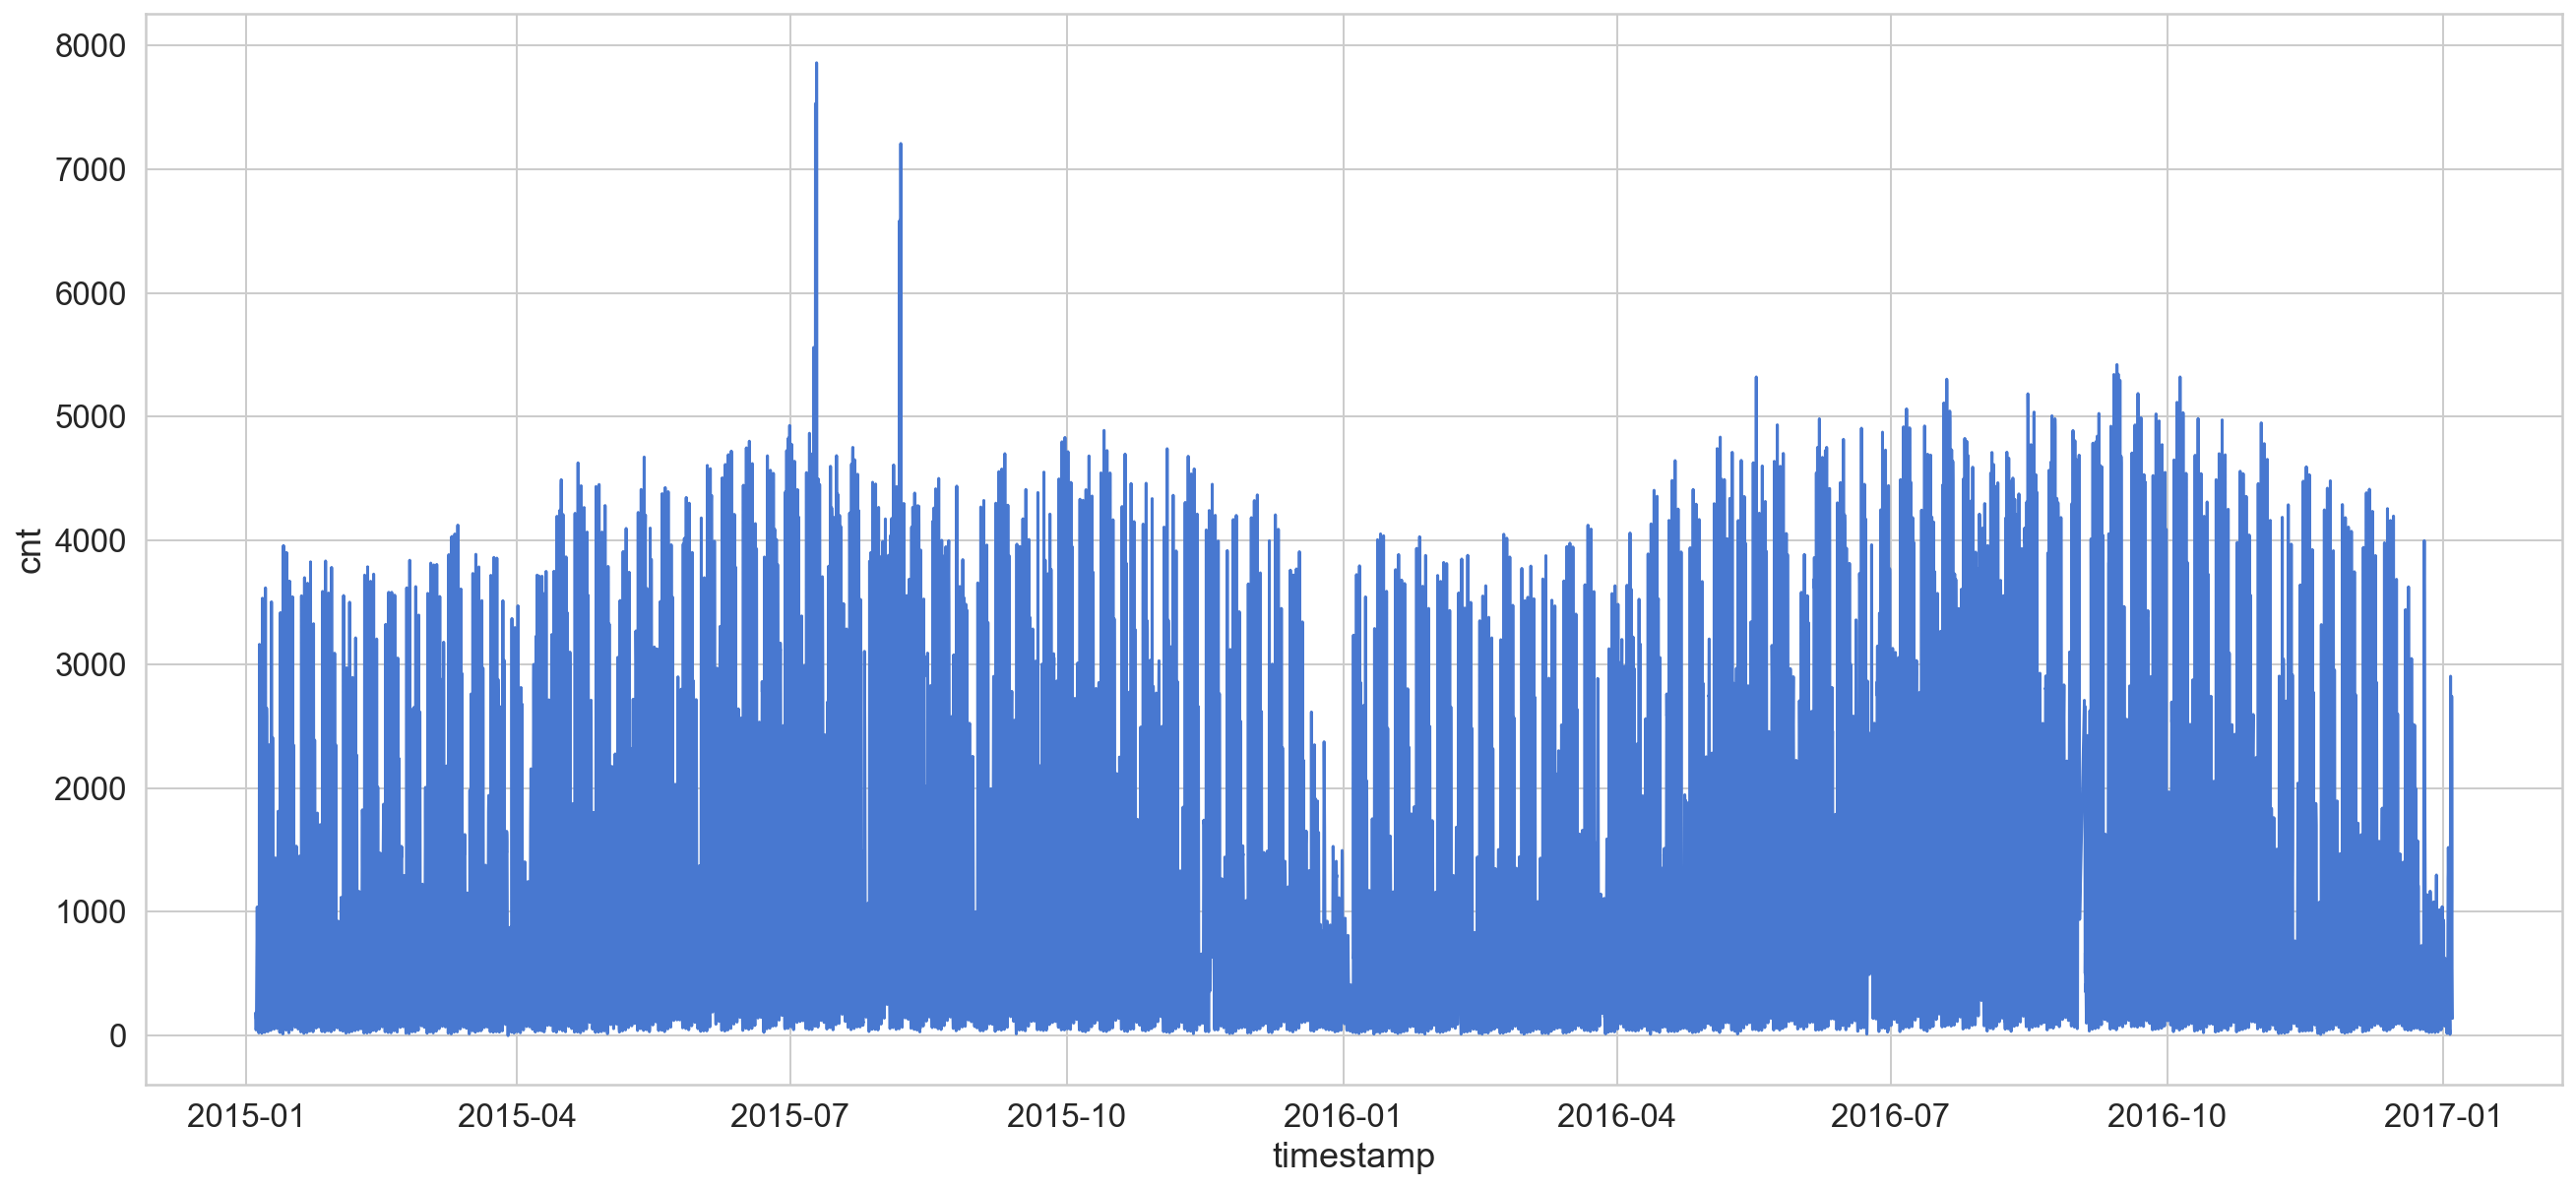

In [15]:
sns.lineplot(x=df.index, y="cnt", data=df )

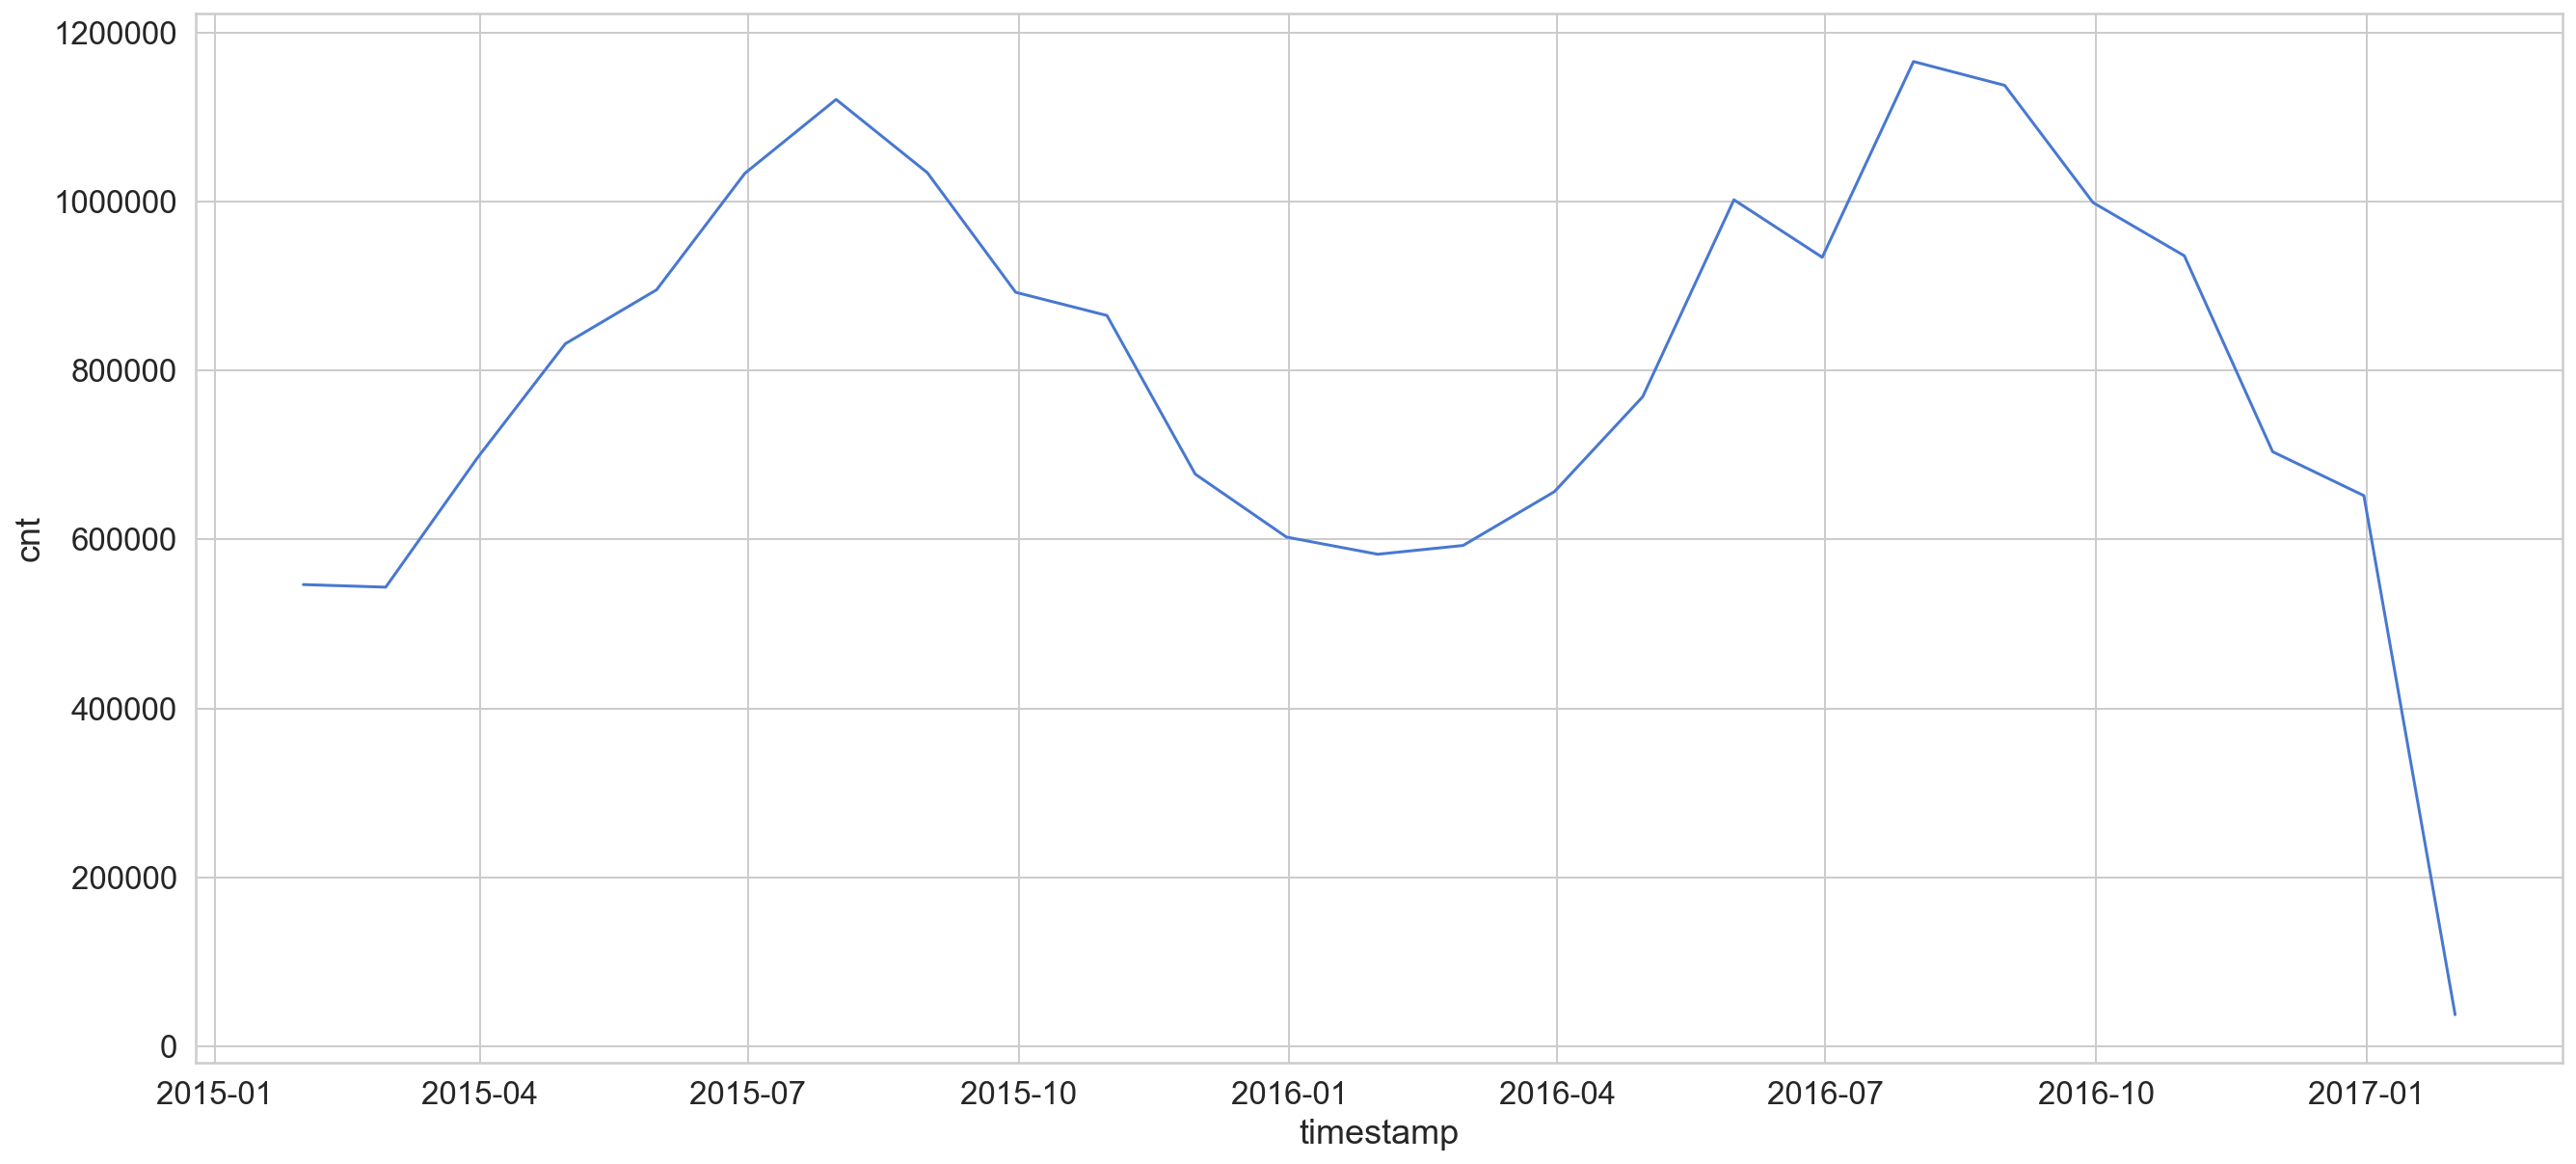

In [18]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

In [37]:
df_by_month.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0,7709,11753,2014,671
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0,7707,9734,2015,1342
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0,8540,11751,2174,2217
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0,8270,11156,2131,2876
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0,8556,11904,2376,3720


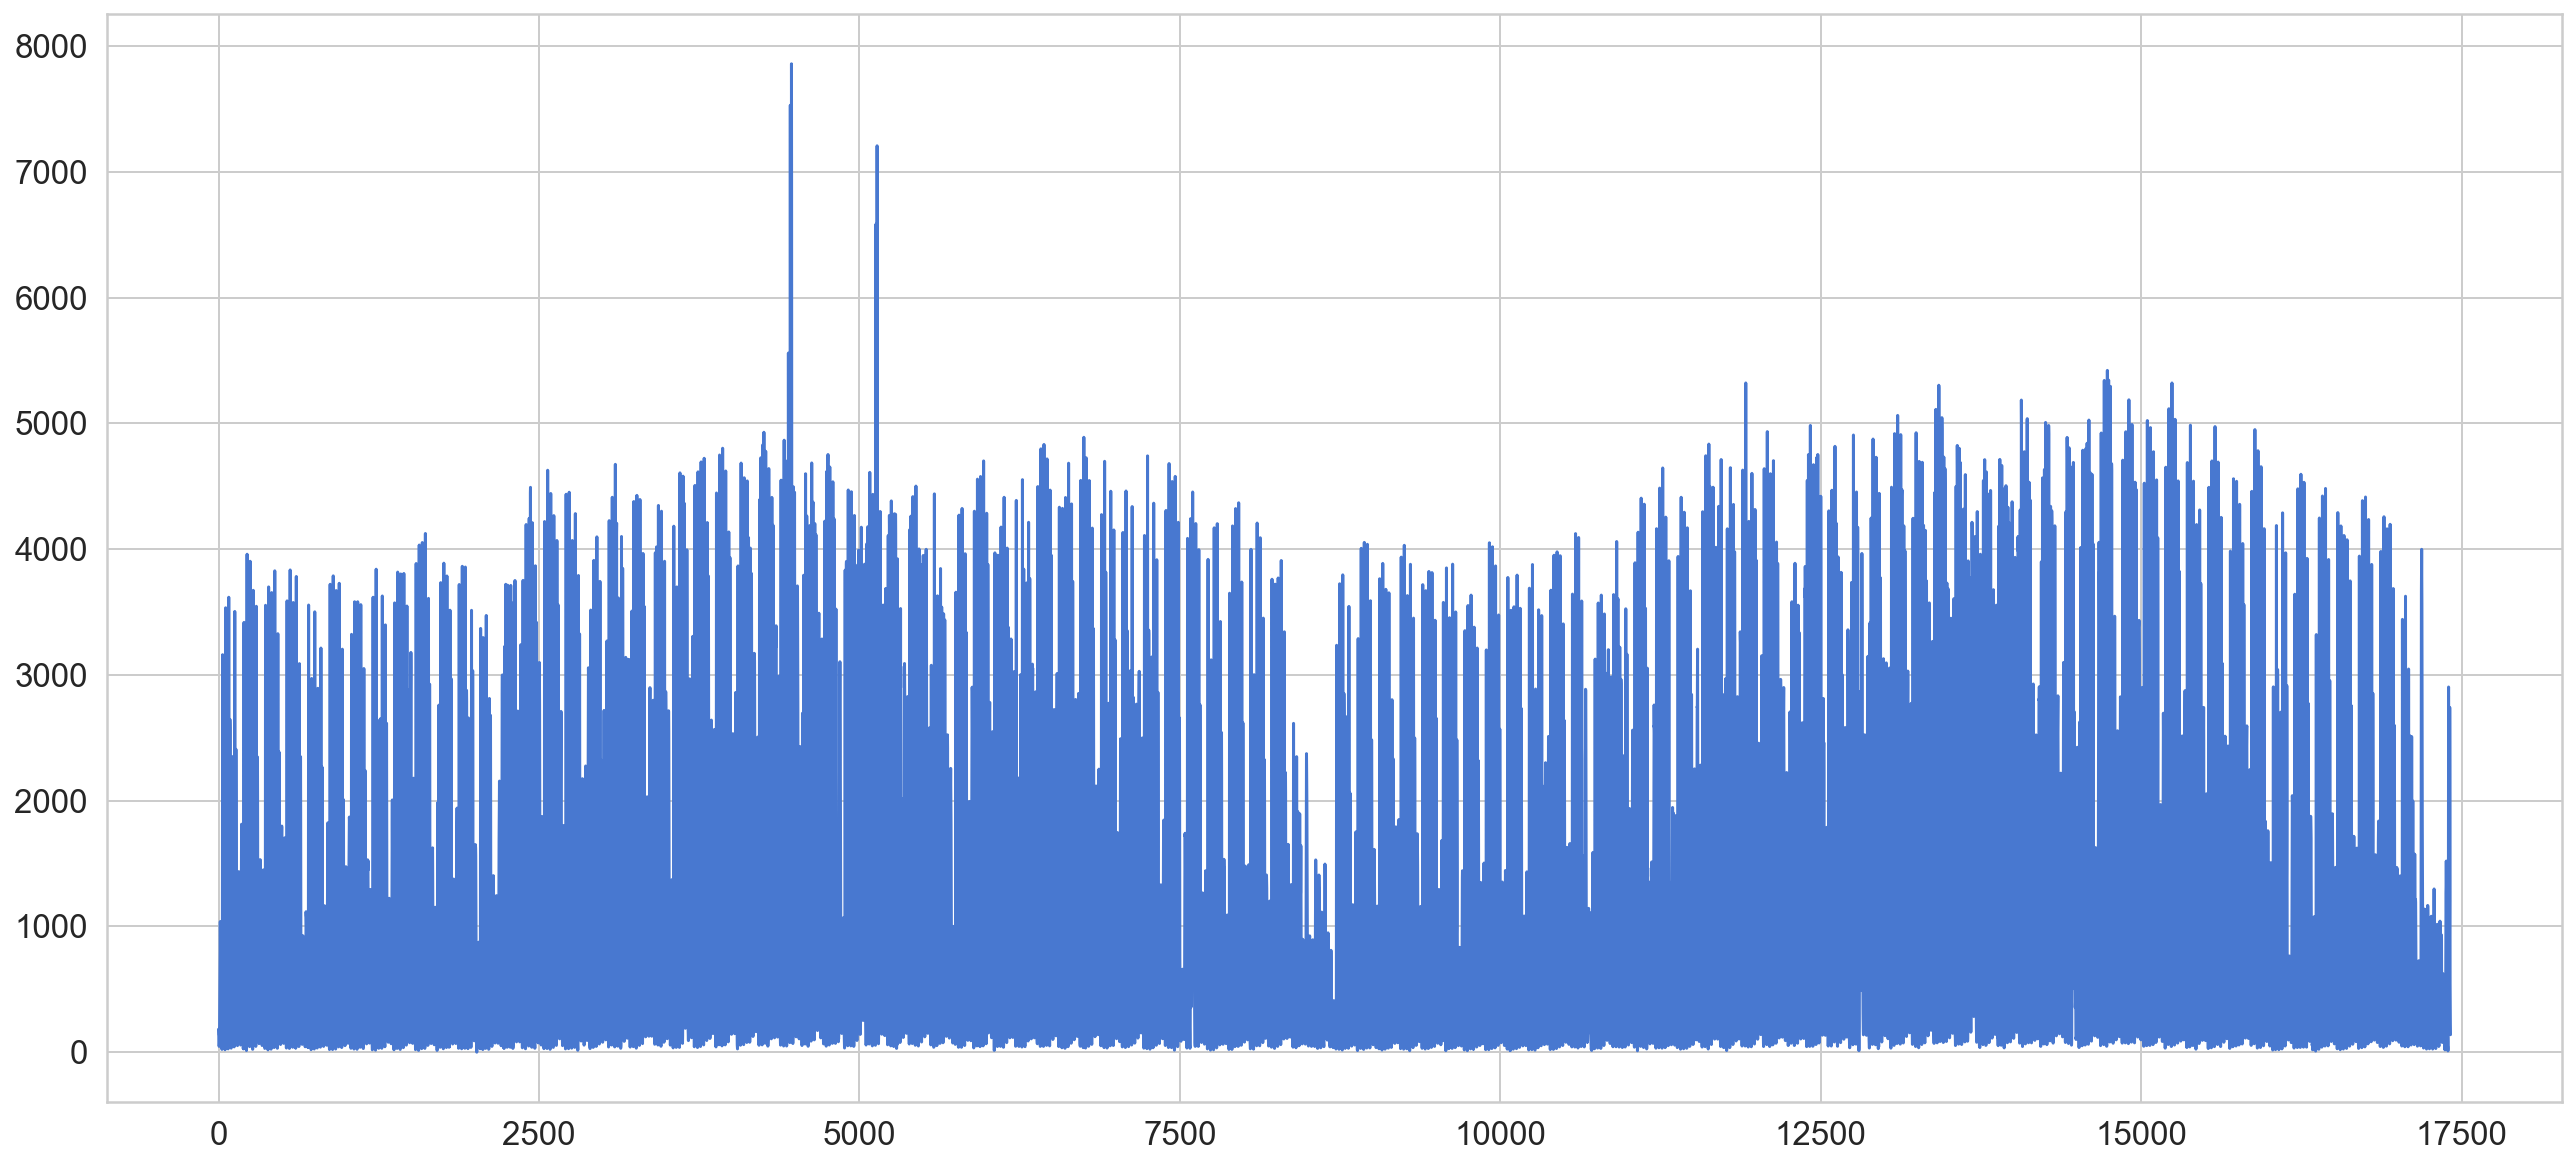

In [60]:
t=df["cnt"].tolist()
pd.Series(t).plot()

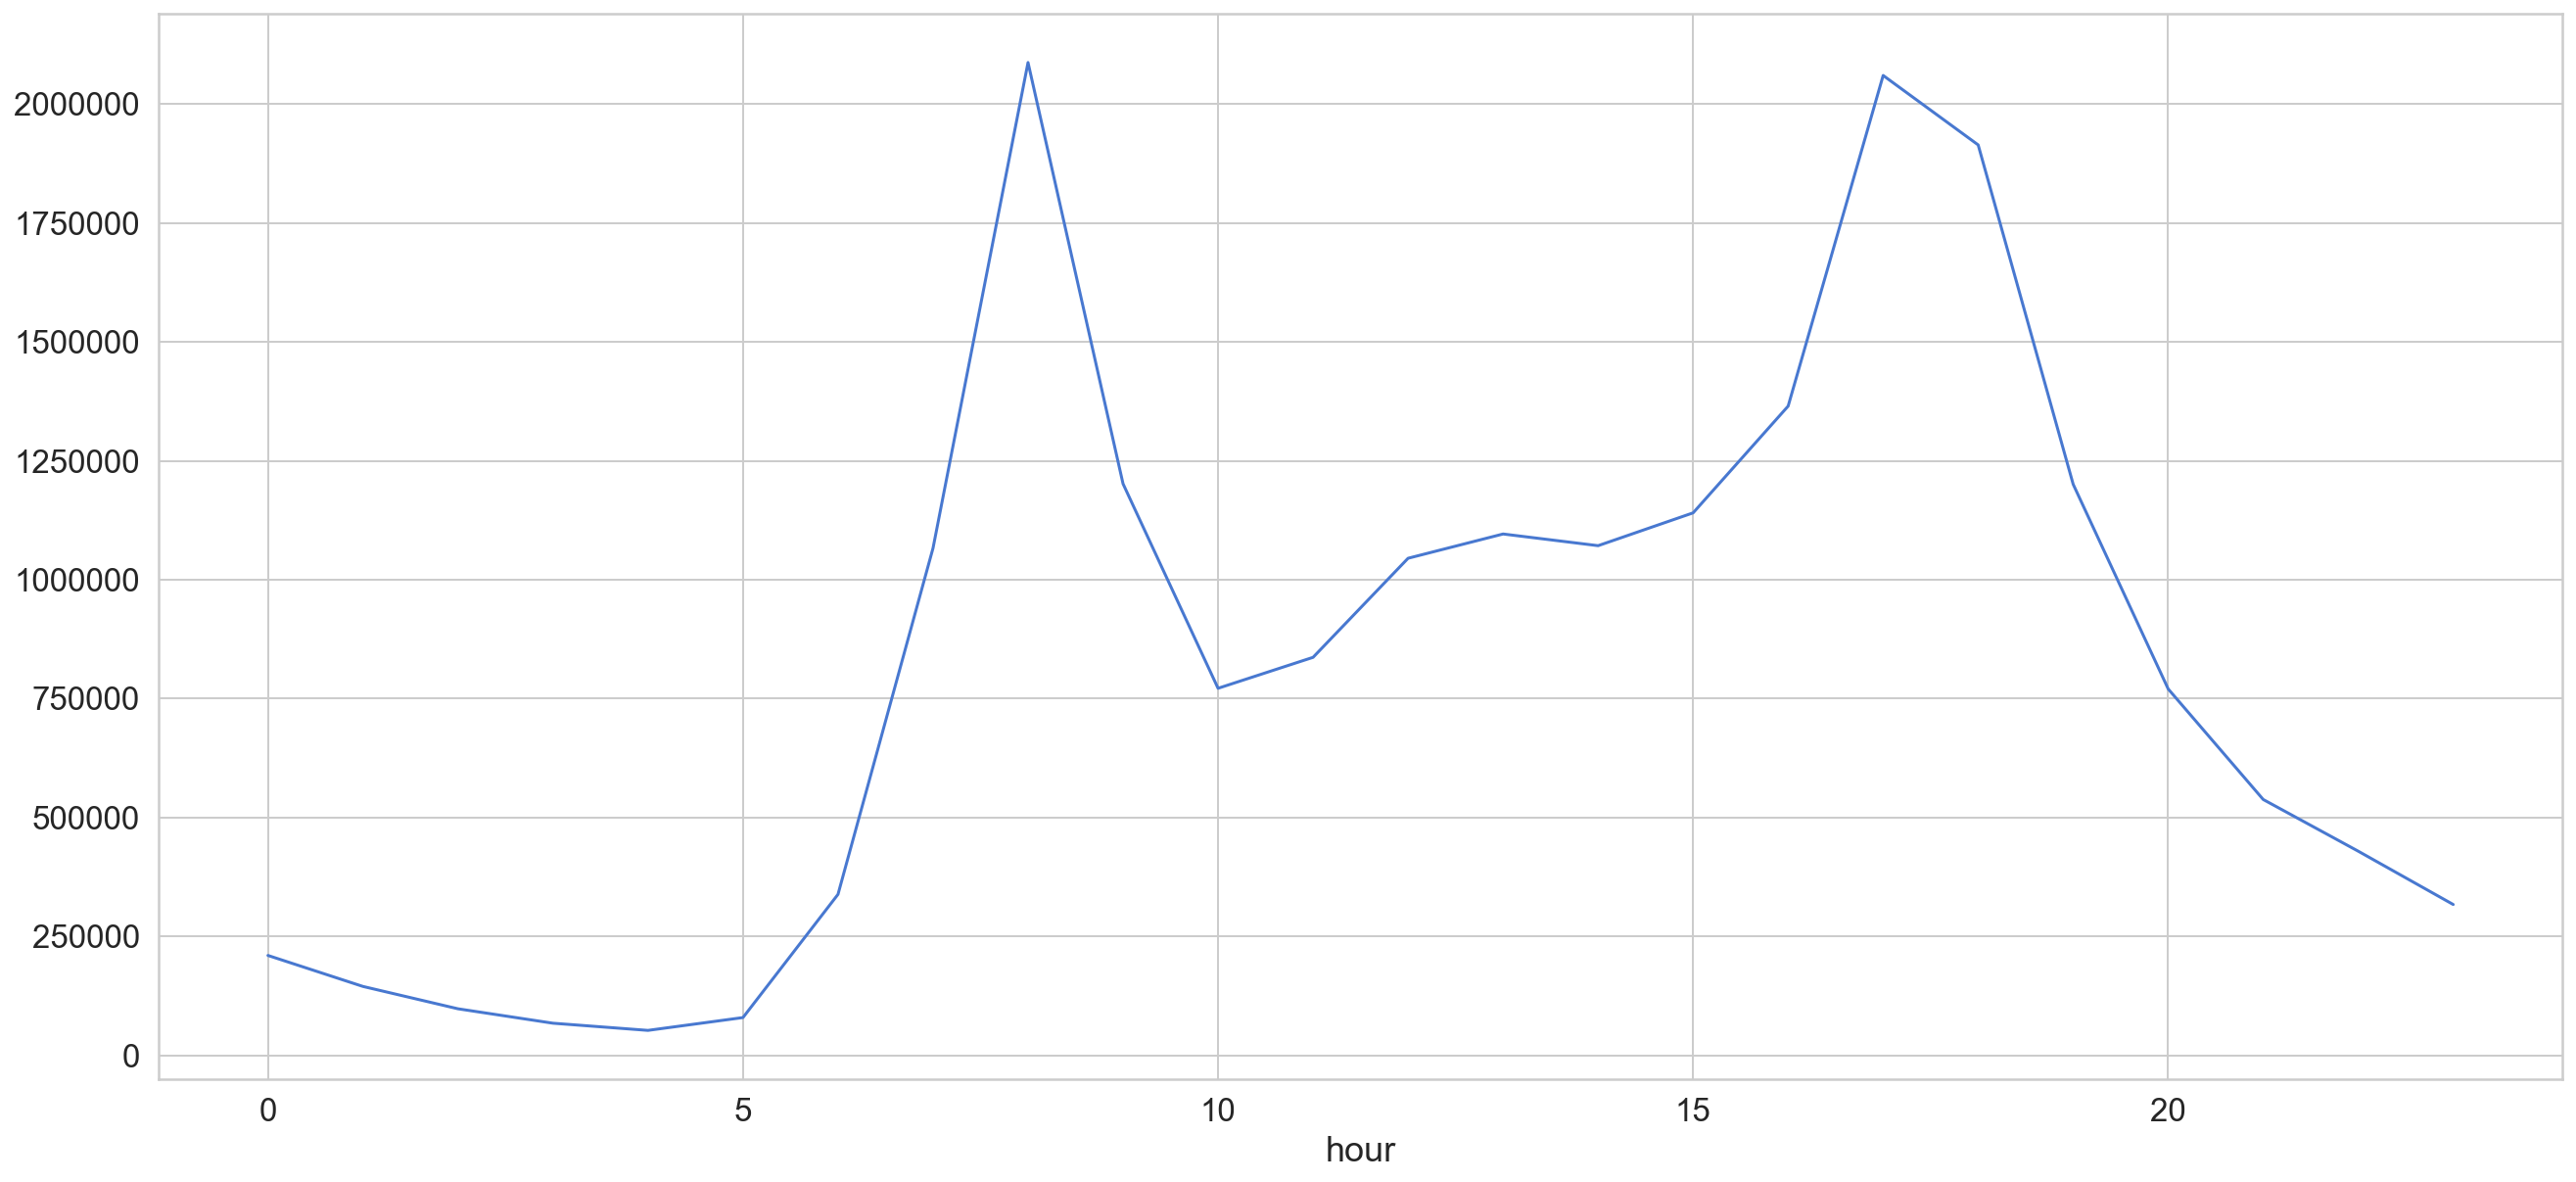

In [35]:
df.groupby("hour")["cnt"].sum().plot()

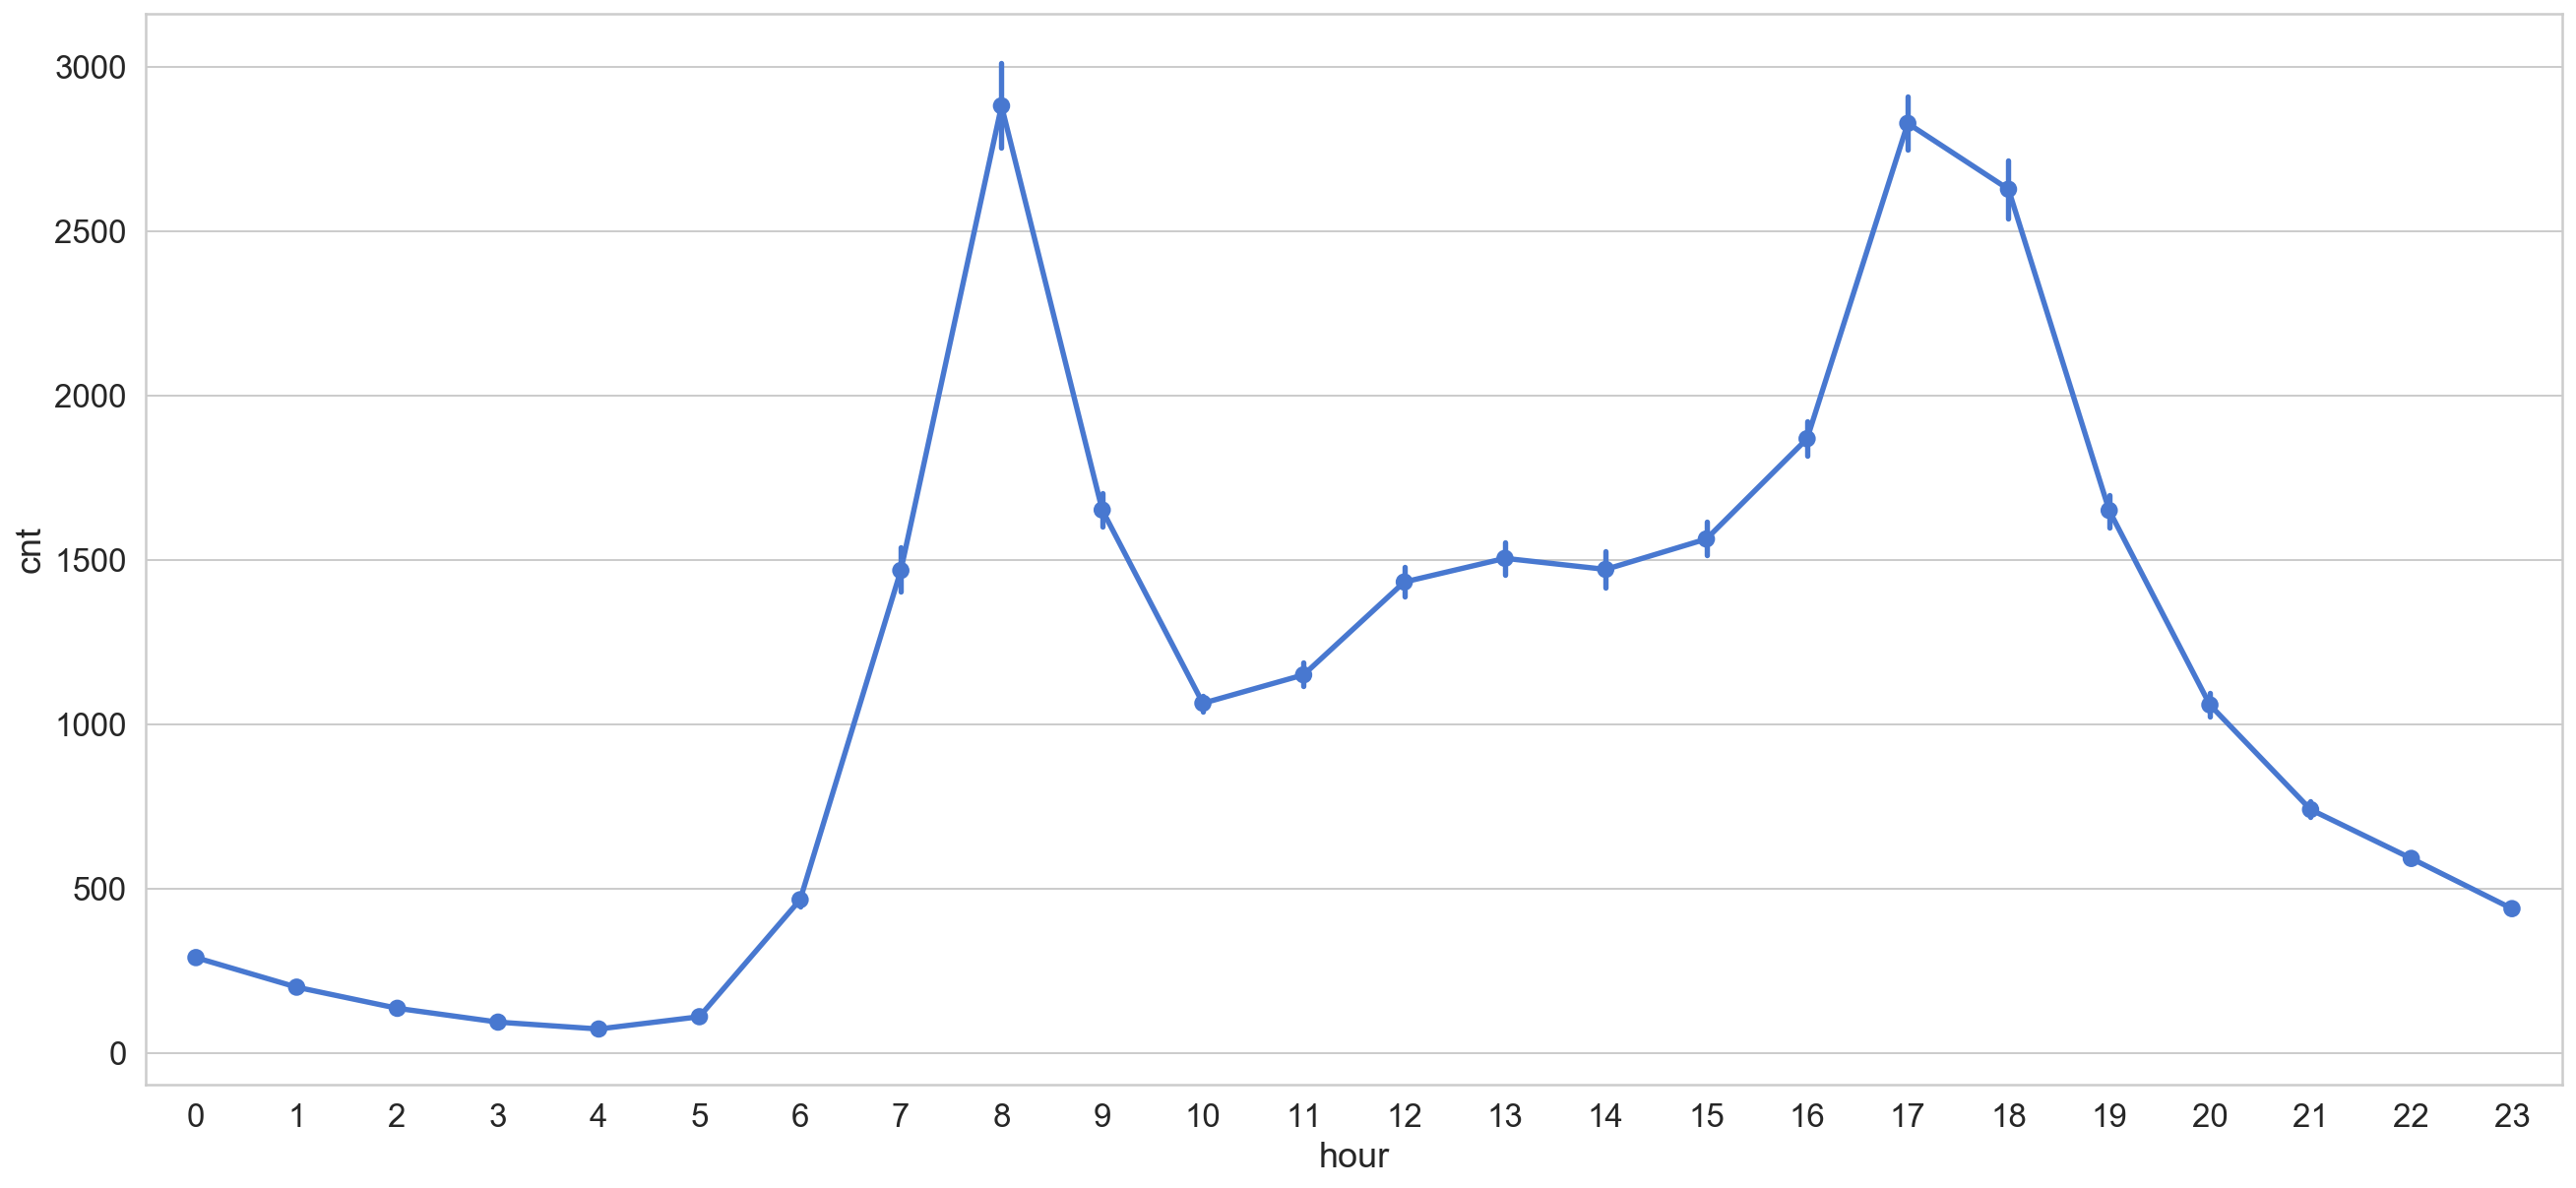

In [19]:
sns.pointplot(data=df, x='hour', y='cnt')

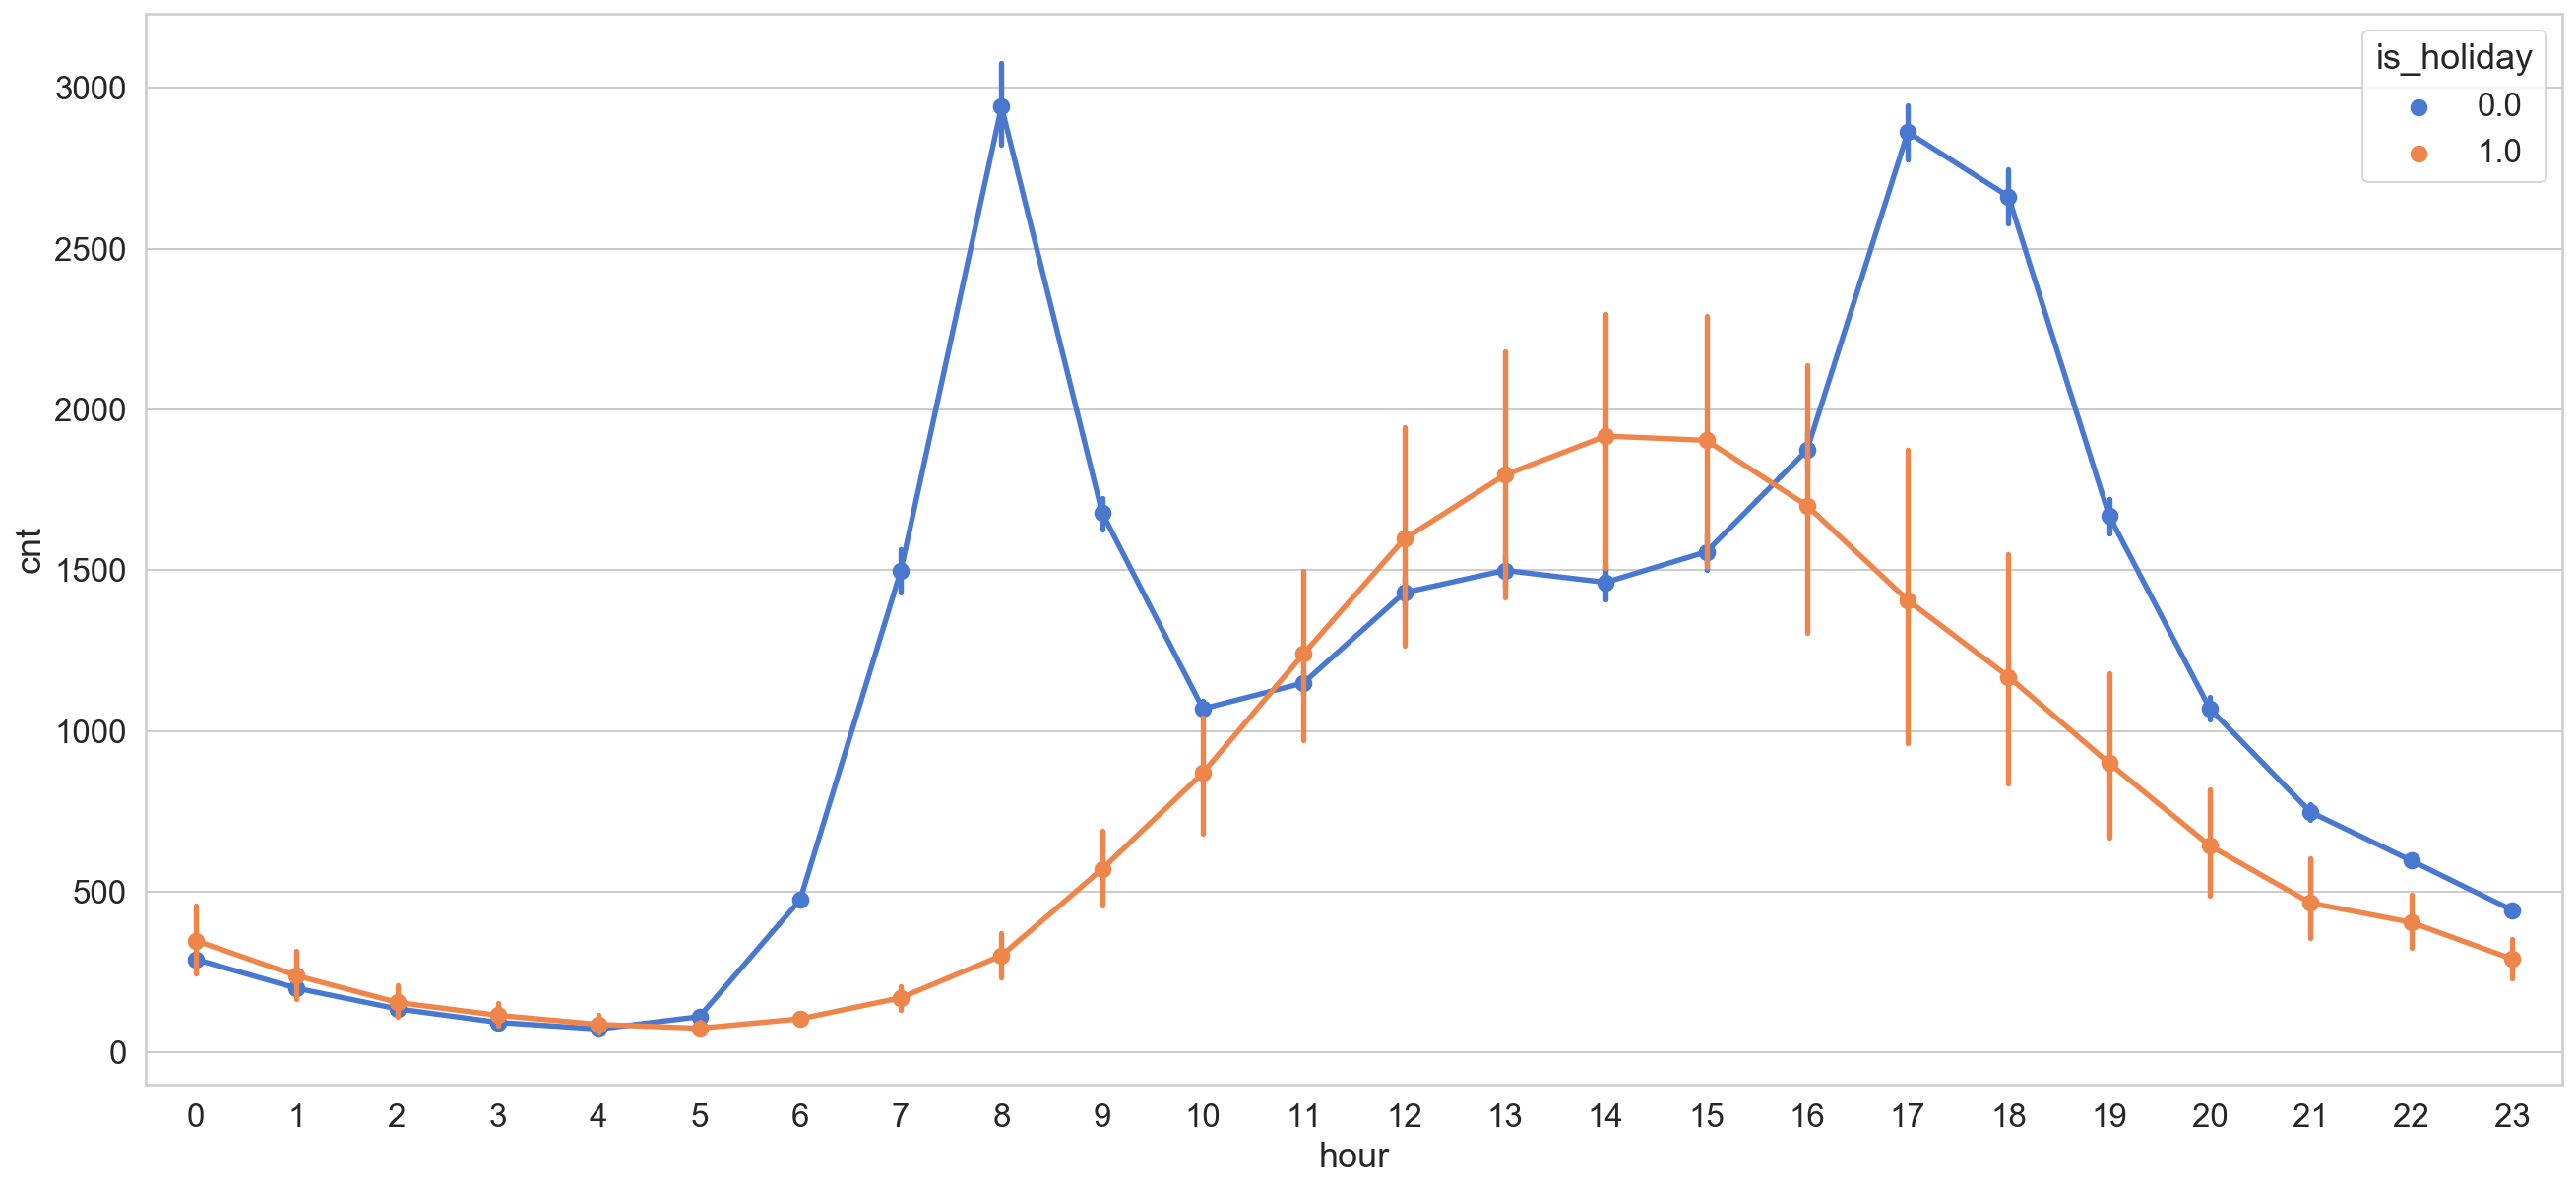

In [38]:
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday')

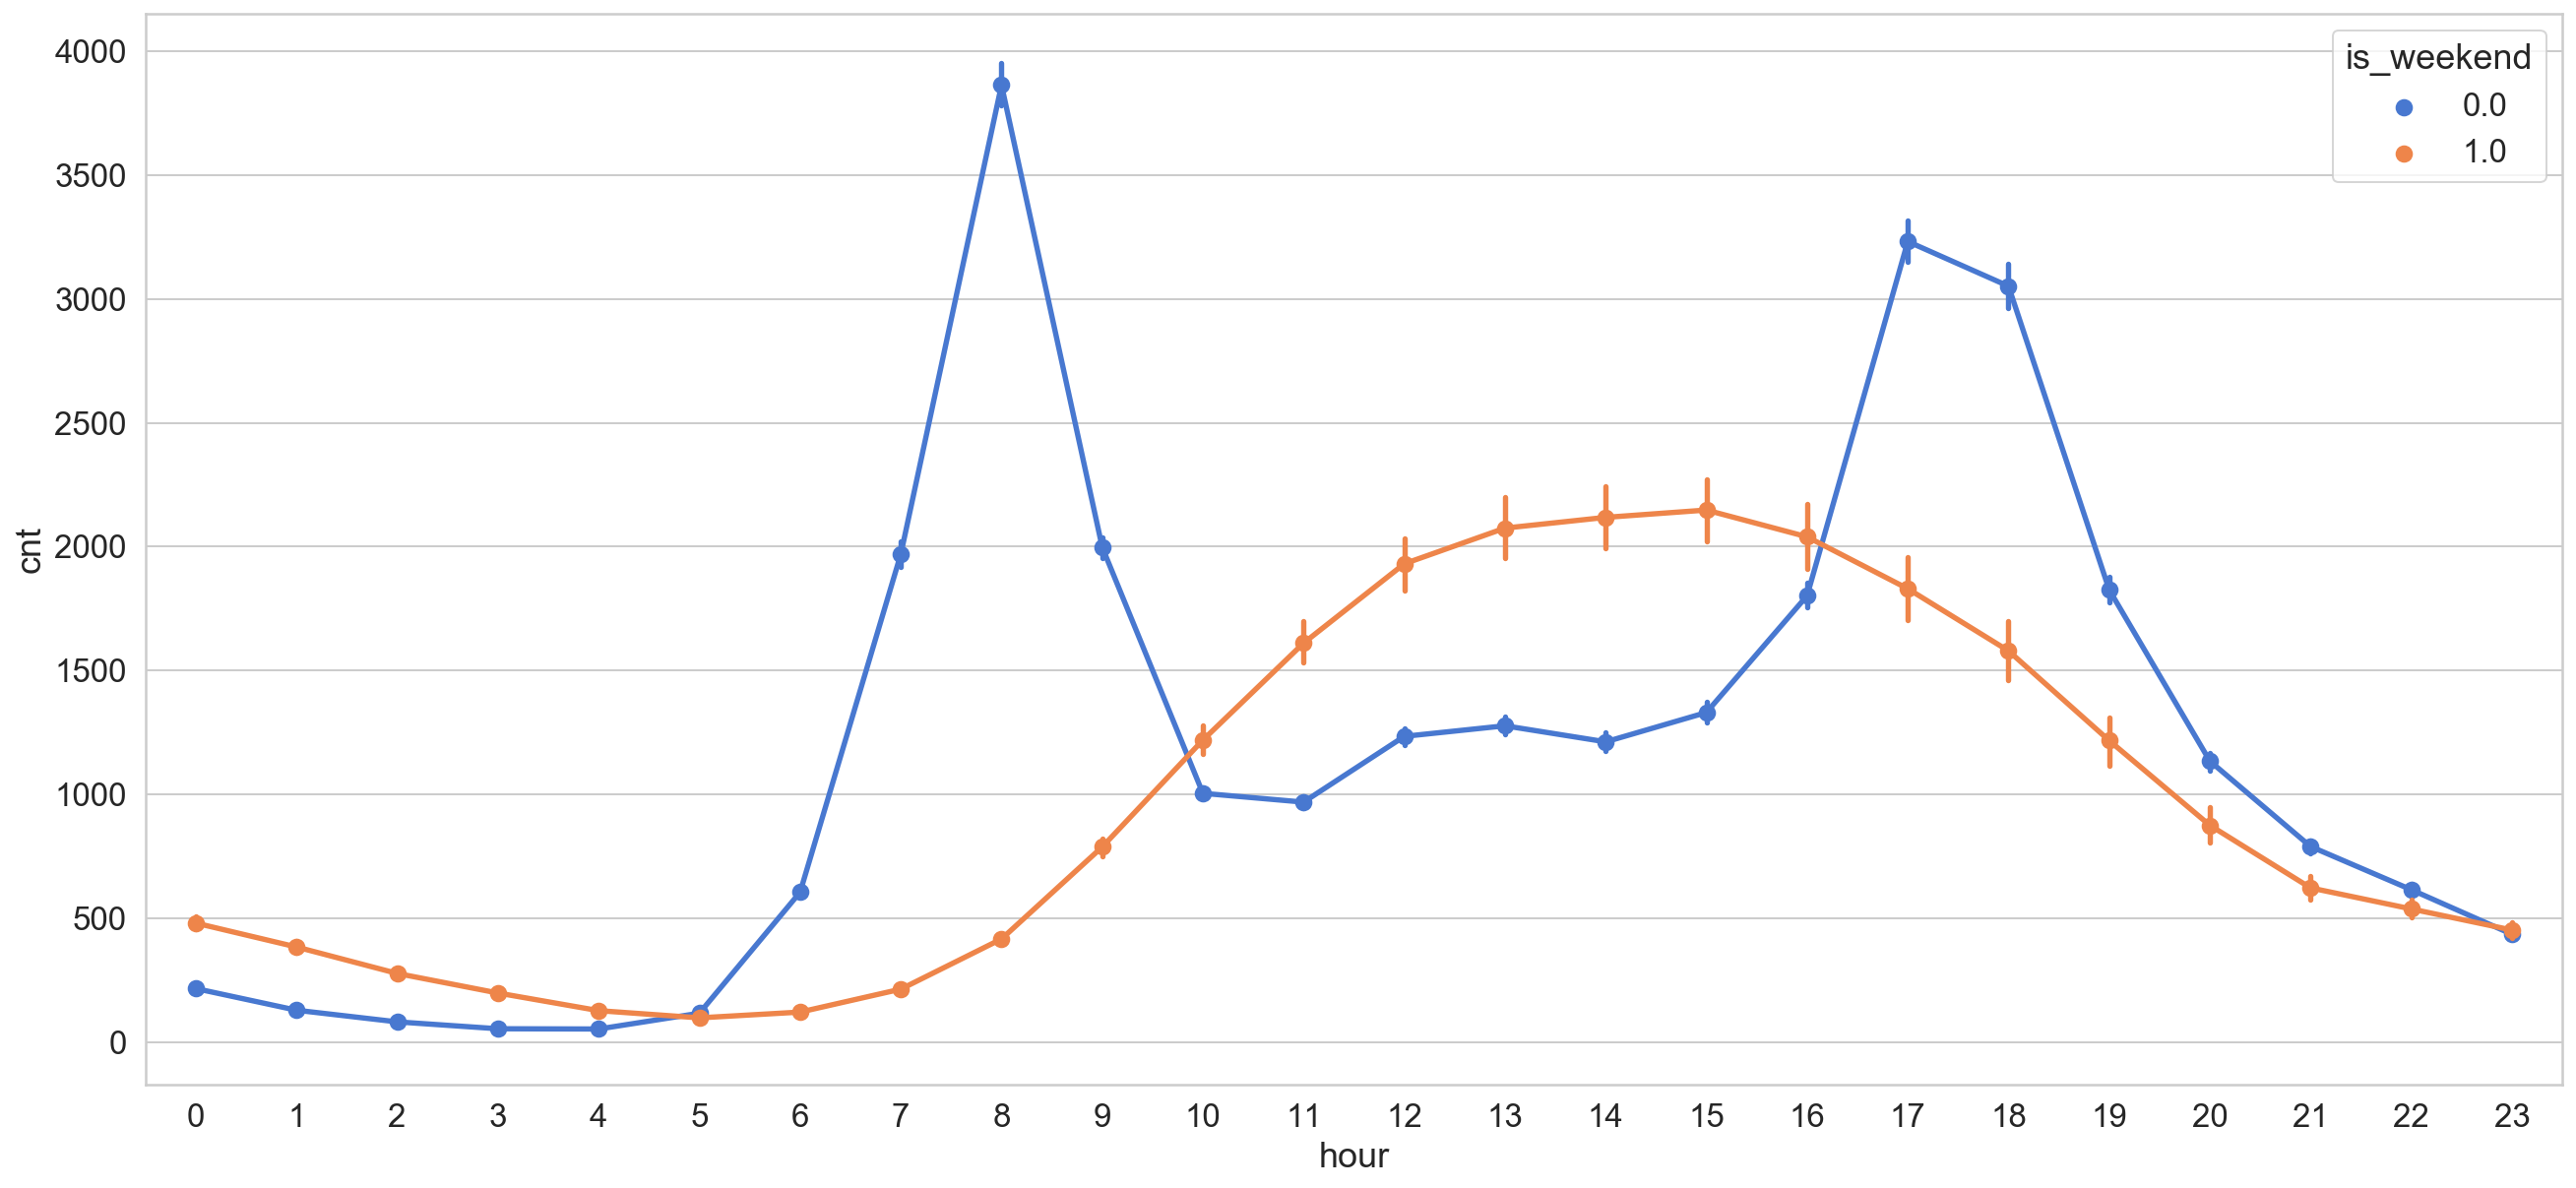

In [39]:
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend')


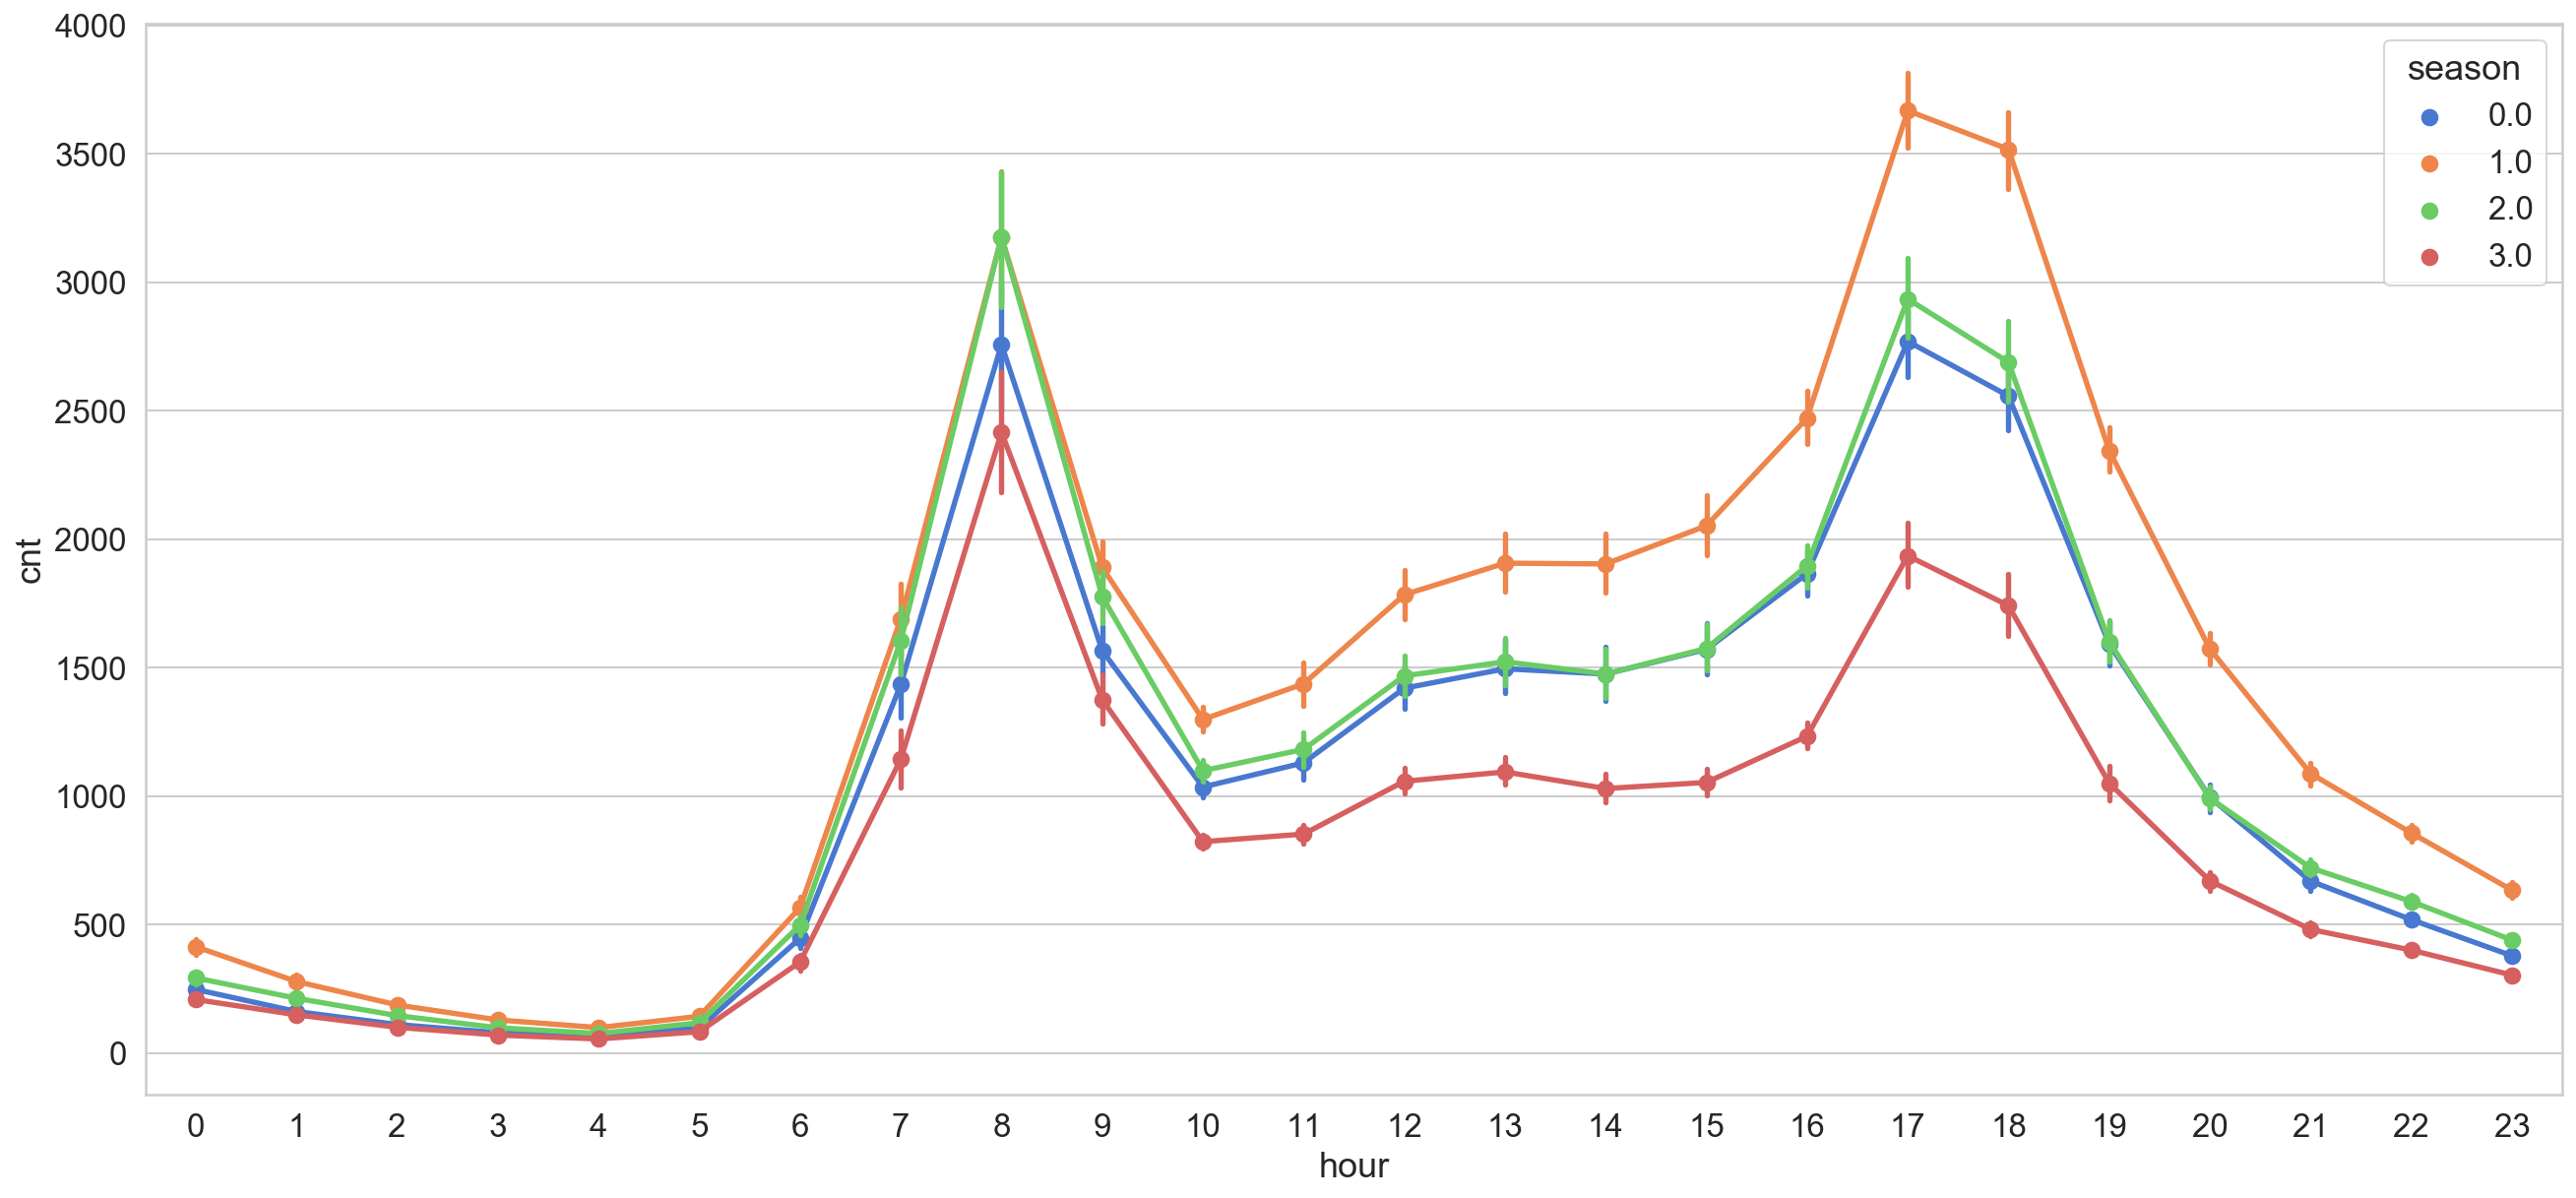

In [40]:
sns.pointplot(data=df, x='hour', y='cnt', hue='season')

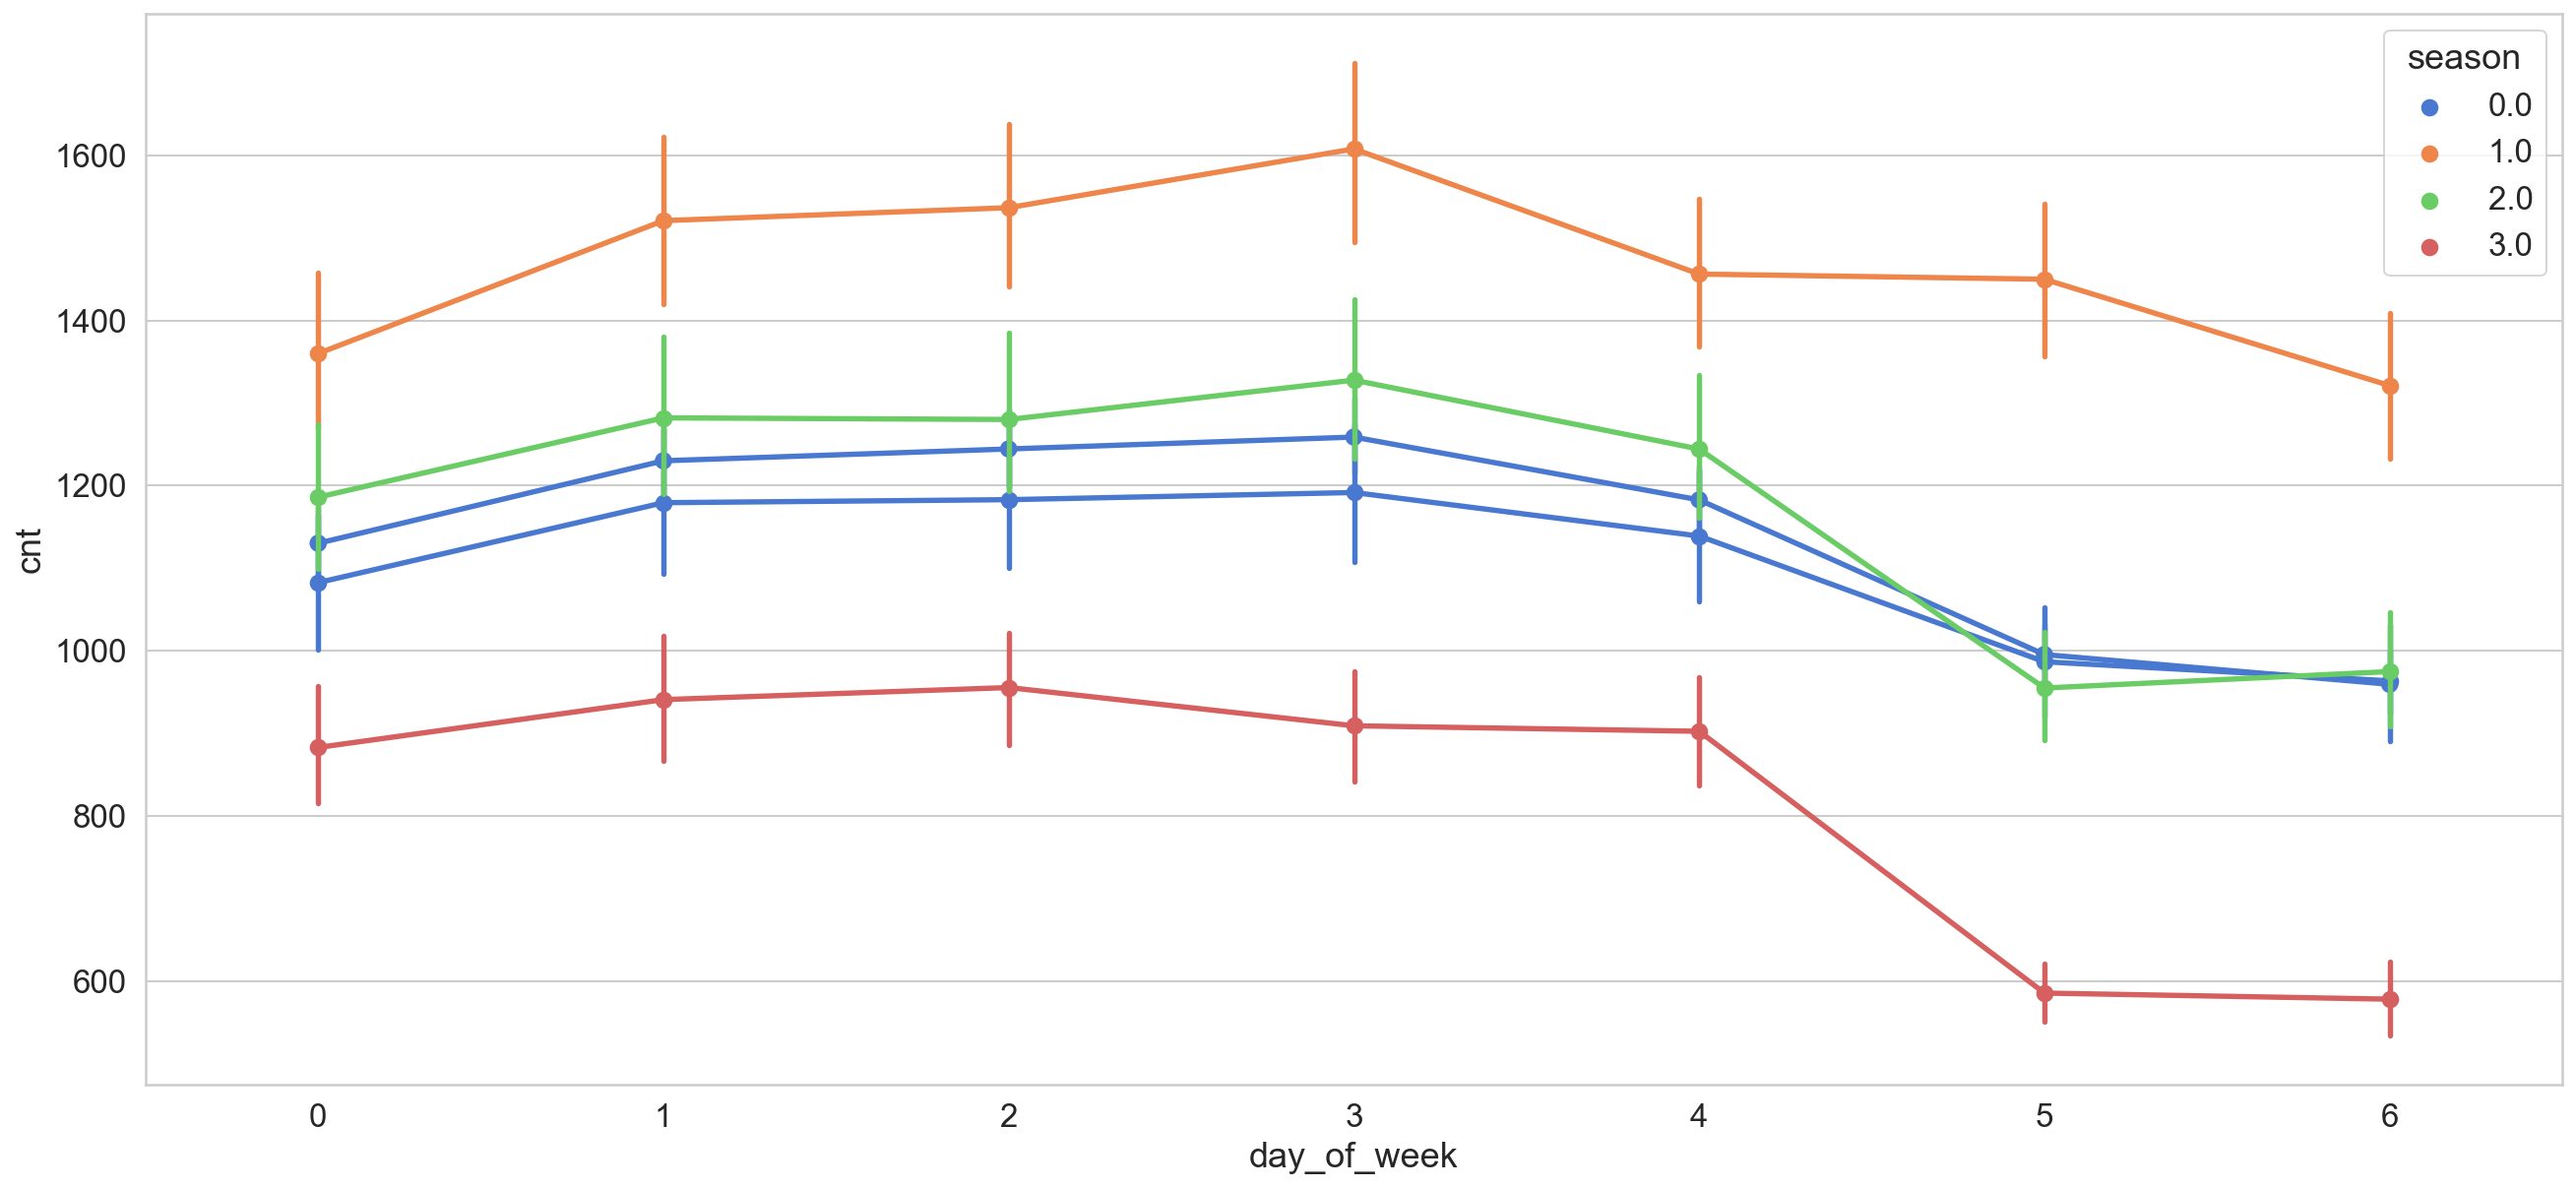

In [43]:
sns.pointplot(data=df, x='day_of_week', y='cnt')
sns.pointplot(data=df, x='day_of_week', y='cnt', hue='season')

In [47]:
#TRAIN TEST SPLIT

In [44]:
train_size = int(len(df) * 0.9)
train_size

15672

In [45]:
test_size = len(df) - train_size
test_size

1742

In [48]:
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [96]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.464876,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,-0.495179,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,-0.497934,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,-0.540634,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,-0.557851,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.440771,-0.6250,-0.571429,0.825,-0.818182,2.0,0.0,1.0,2.0,3,23,6,10
2016-10-23 04:00:00,-0.486915,-0.6250,-0.571429,0.975,-0.818182,2.0,0.0,1.0,2.0,4,23,6,10
2016-10-23 05:00:00,-0.516529,-0.6250,-0.476190,0.675,-1.000000,3.0,0.0,1.0,2.0,5,23,6,10


In [50]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']


f_transformer = RobustScaler() # for columns
cnt_transformer = RobustScaler() # this is for count

f_transformer = f_transformer.fit(train[f_columns].to_numpy()) #fit
cnt_transformer = cnt_transformer.fit(train[['cnt']]) #fit

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy()) #transform train col
train['cnt'] = cnt_transformer.transform(train[['cnt']])#transform train count

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy()) #transform test col
test['cnt'] = cnt_transformer.transform(test[['cnt']])#transform test count

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [51]:
#function to make Timeseries dataset

In [52]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [53]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


In [110]:
X_test.shape

(1732, 10, 13)

In [69]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

model.compile(loss="mean_squared_error", optimizer="adam")

In [70]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)


Epoch 1/30
441/441 [==============================] - 10s 23ms/step - loss: 0.3270 - val_loss: 0.1255
Epoch 2/30
441/441 [==============================] - 8s 19ms/step - loss: 0.0818 - val_loss: 0.0661
Epoch 3/30
441/441 [==============================] - 9s 21ms/step - loss: 0.0512 - val_loss: 0.0552
Epoch 4/30
441/441 [==============================] - 9s 21ms/step - loss: 0.0389 - val_loss: 0.0355
Epoch 5/30
441/441 [==============================] - 9s 21ms/step - loss: 0.0306 - val_loss: 0.0309
Epoch 6/30
441/441 [==============================] - 9s 21ms/step - loss: 0.0276 - val_loss: 0.0306
Epoch 7/30
441/441 [==============================] - 10s 22ms/step - loss: 0.0270 - val_loss: 0.0319
Epoch 8/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0239 - val_loss: 0.0315
Epoch 9/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0235 - val_loss: 0.0320
Epoch 10/30
441/441 [==============================] - 7s 17ms/step - loss: 0.0217 - val_

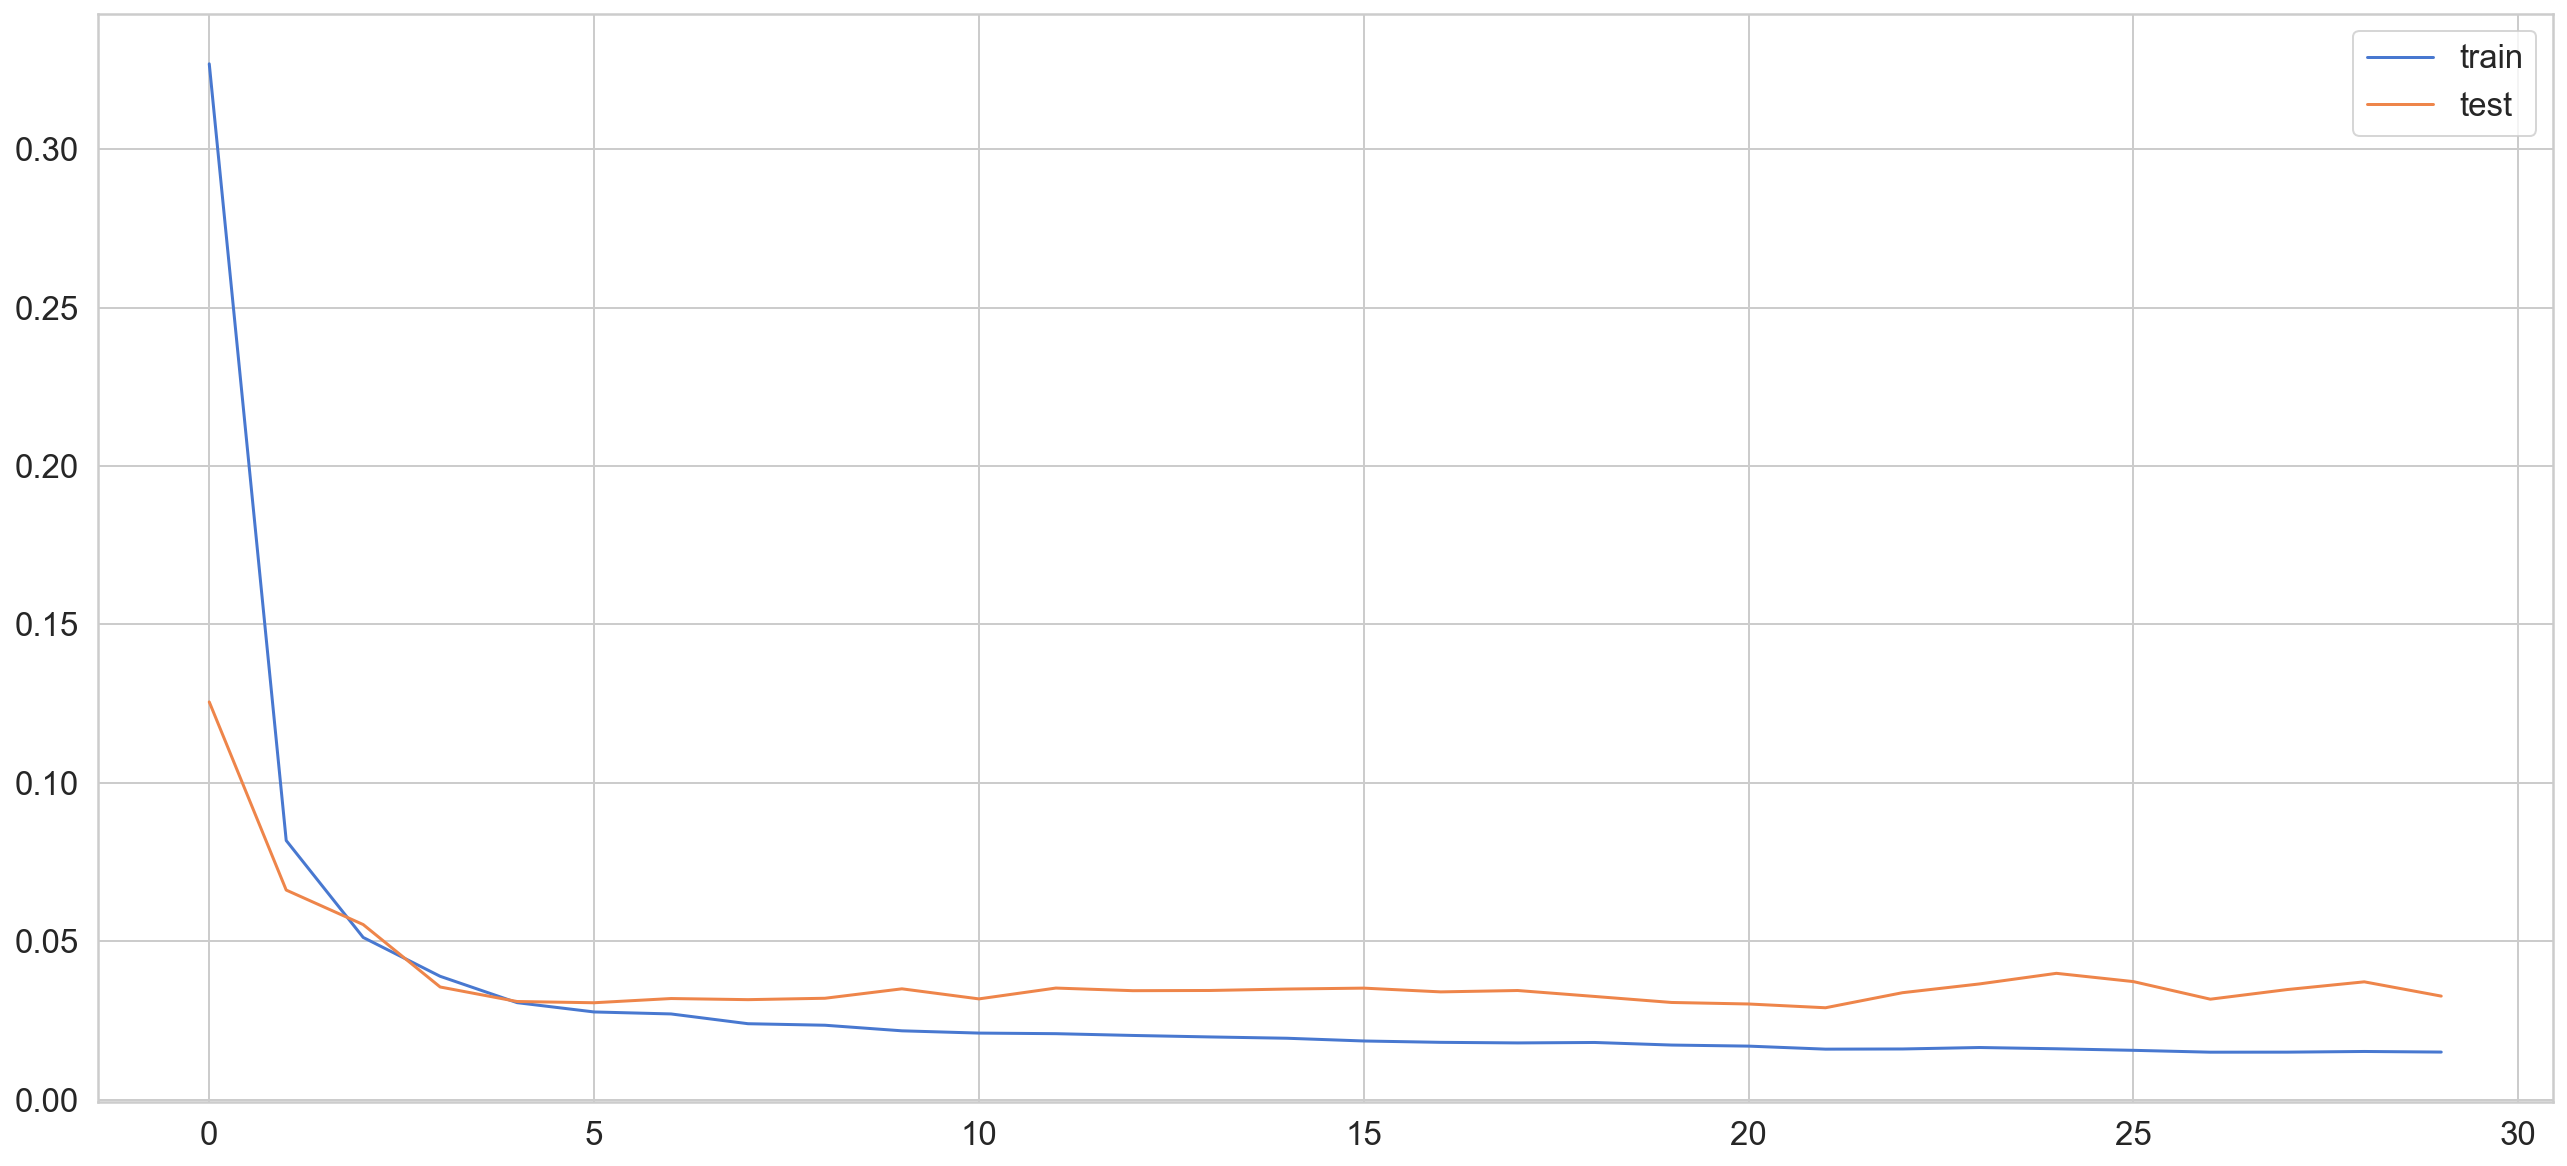

In [72]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [73]:
y_pred = model.predict(X_test)

In [74]:
y_pred

array([[ 0.46048093],
       [ 0.09368174],
       [-0.1103925 ],
       ...,
       [-0.24928005],
       [-0.37073395],
       [-0.4463628 ]], dtype=float32)

In [79]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,-1.0000,-1.142857,0.375,0.363636,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,-1.0000,-1.142857,0.375,0.545455,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,-0.9375,-1.095238,0.250,0.818182,4.0,0.0,0.0,3.0,21,3,1,1


In [80]:

y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [85]:
X_train.shape

(15662, 10, 13)

In [86]:
n_features=13
n_steps=10

In [88]:
X_train[15661:15662]

array([[[-0.12603306, -0.3125    , -0.23809524,  0.3       ,
         -0.68181818,  1.        ,  0.        ,  1.        ,
          2.        , 21.        , 22.        ,  5.        ,
         10.        ],
        [-0.184573  , -0.375     , -0.28571429,  0.425     ,
         -0.81818182,  1.        ,  0.        ,  1.        ,
          2.        , 22.        , 22.        ,  5.        ,
         10.        ],
        [-0.21556474, -0.375     , -0.28571429,  0.425     ,
         -0.90909091,  2.        ,  0.        ,  1.        ,
          2.        , 23.        , 22.        ,  5.        ,
         10.        ],
        [-0.27548209, -0.5       , -0.38095238,  0.675     ,
         -1.        ,  3.        ,  0.        ,  1.        ,
          2.        ,  0.        , 23.        ,  6.        ,
         10.        ],
        [-0.29476584, -0.5       , -0.42857143,  0.675     ,
         -1.09090909,  3.        ,  0.        ,  1.        ,
          2.        ,  1.        , 23.        ,  6.   

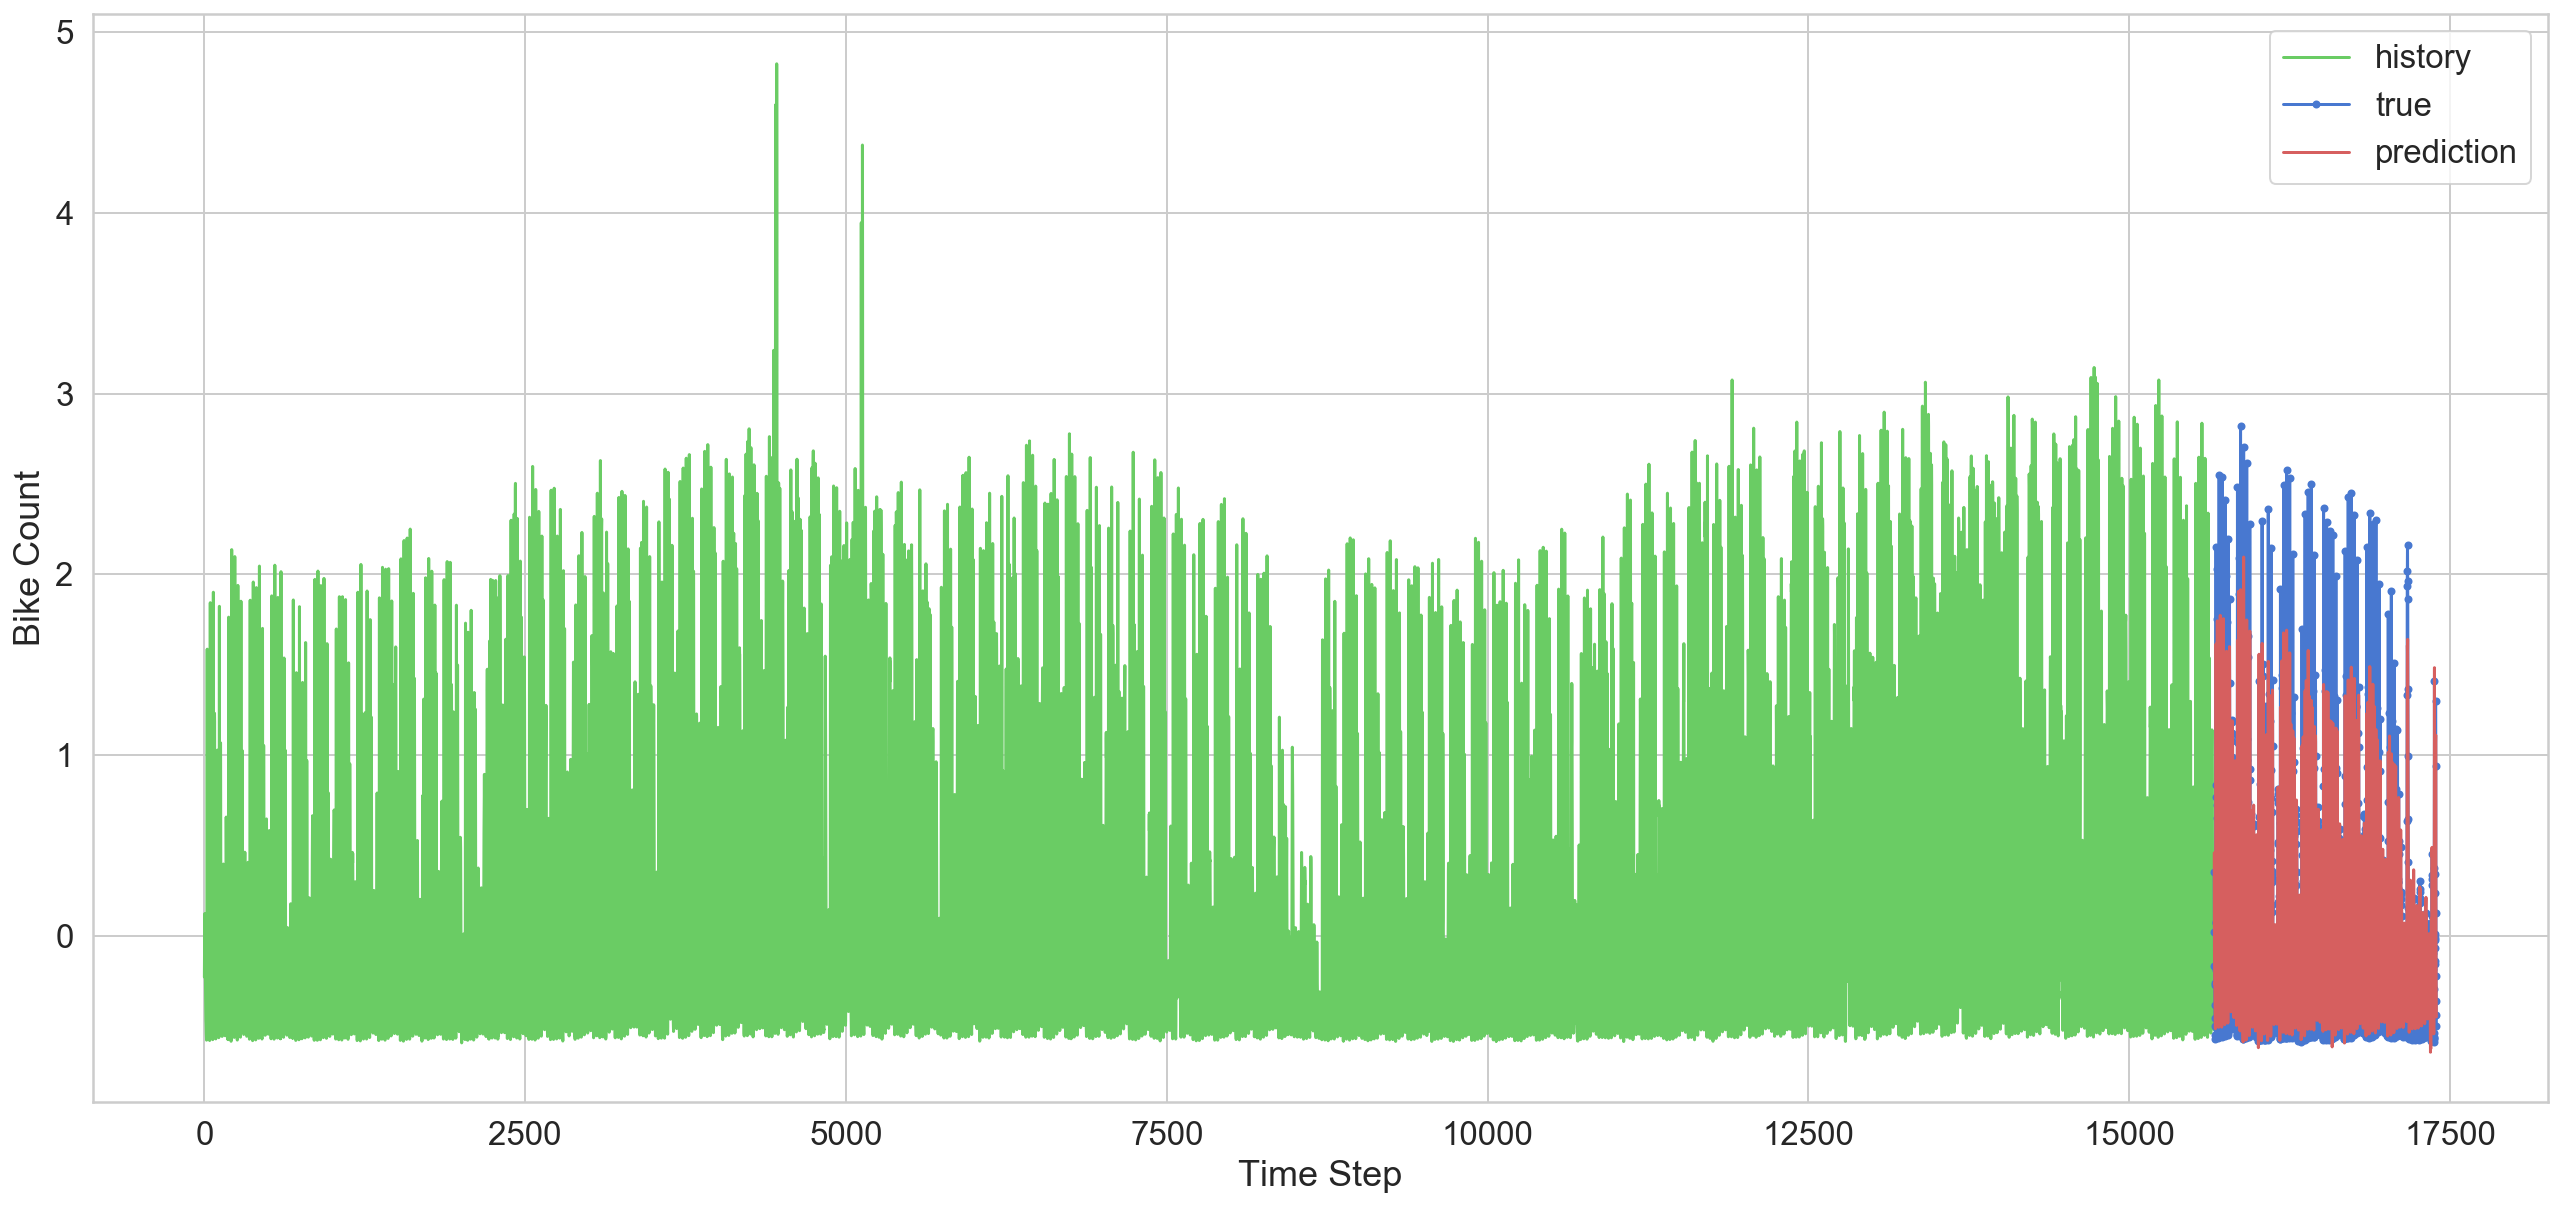

In [94]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

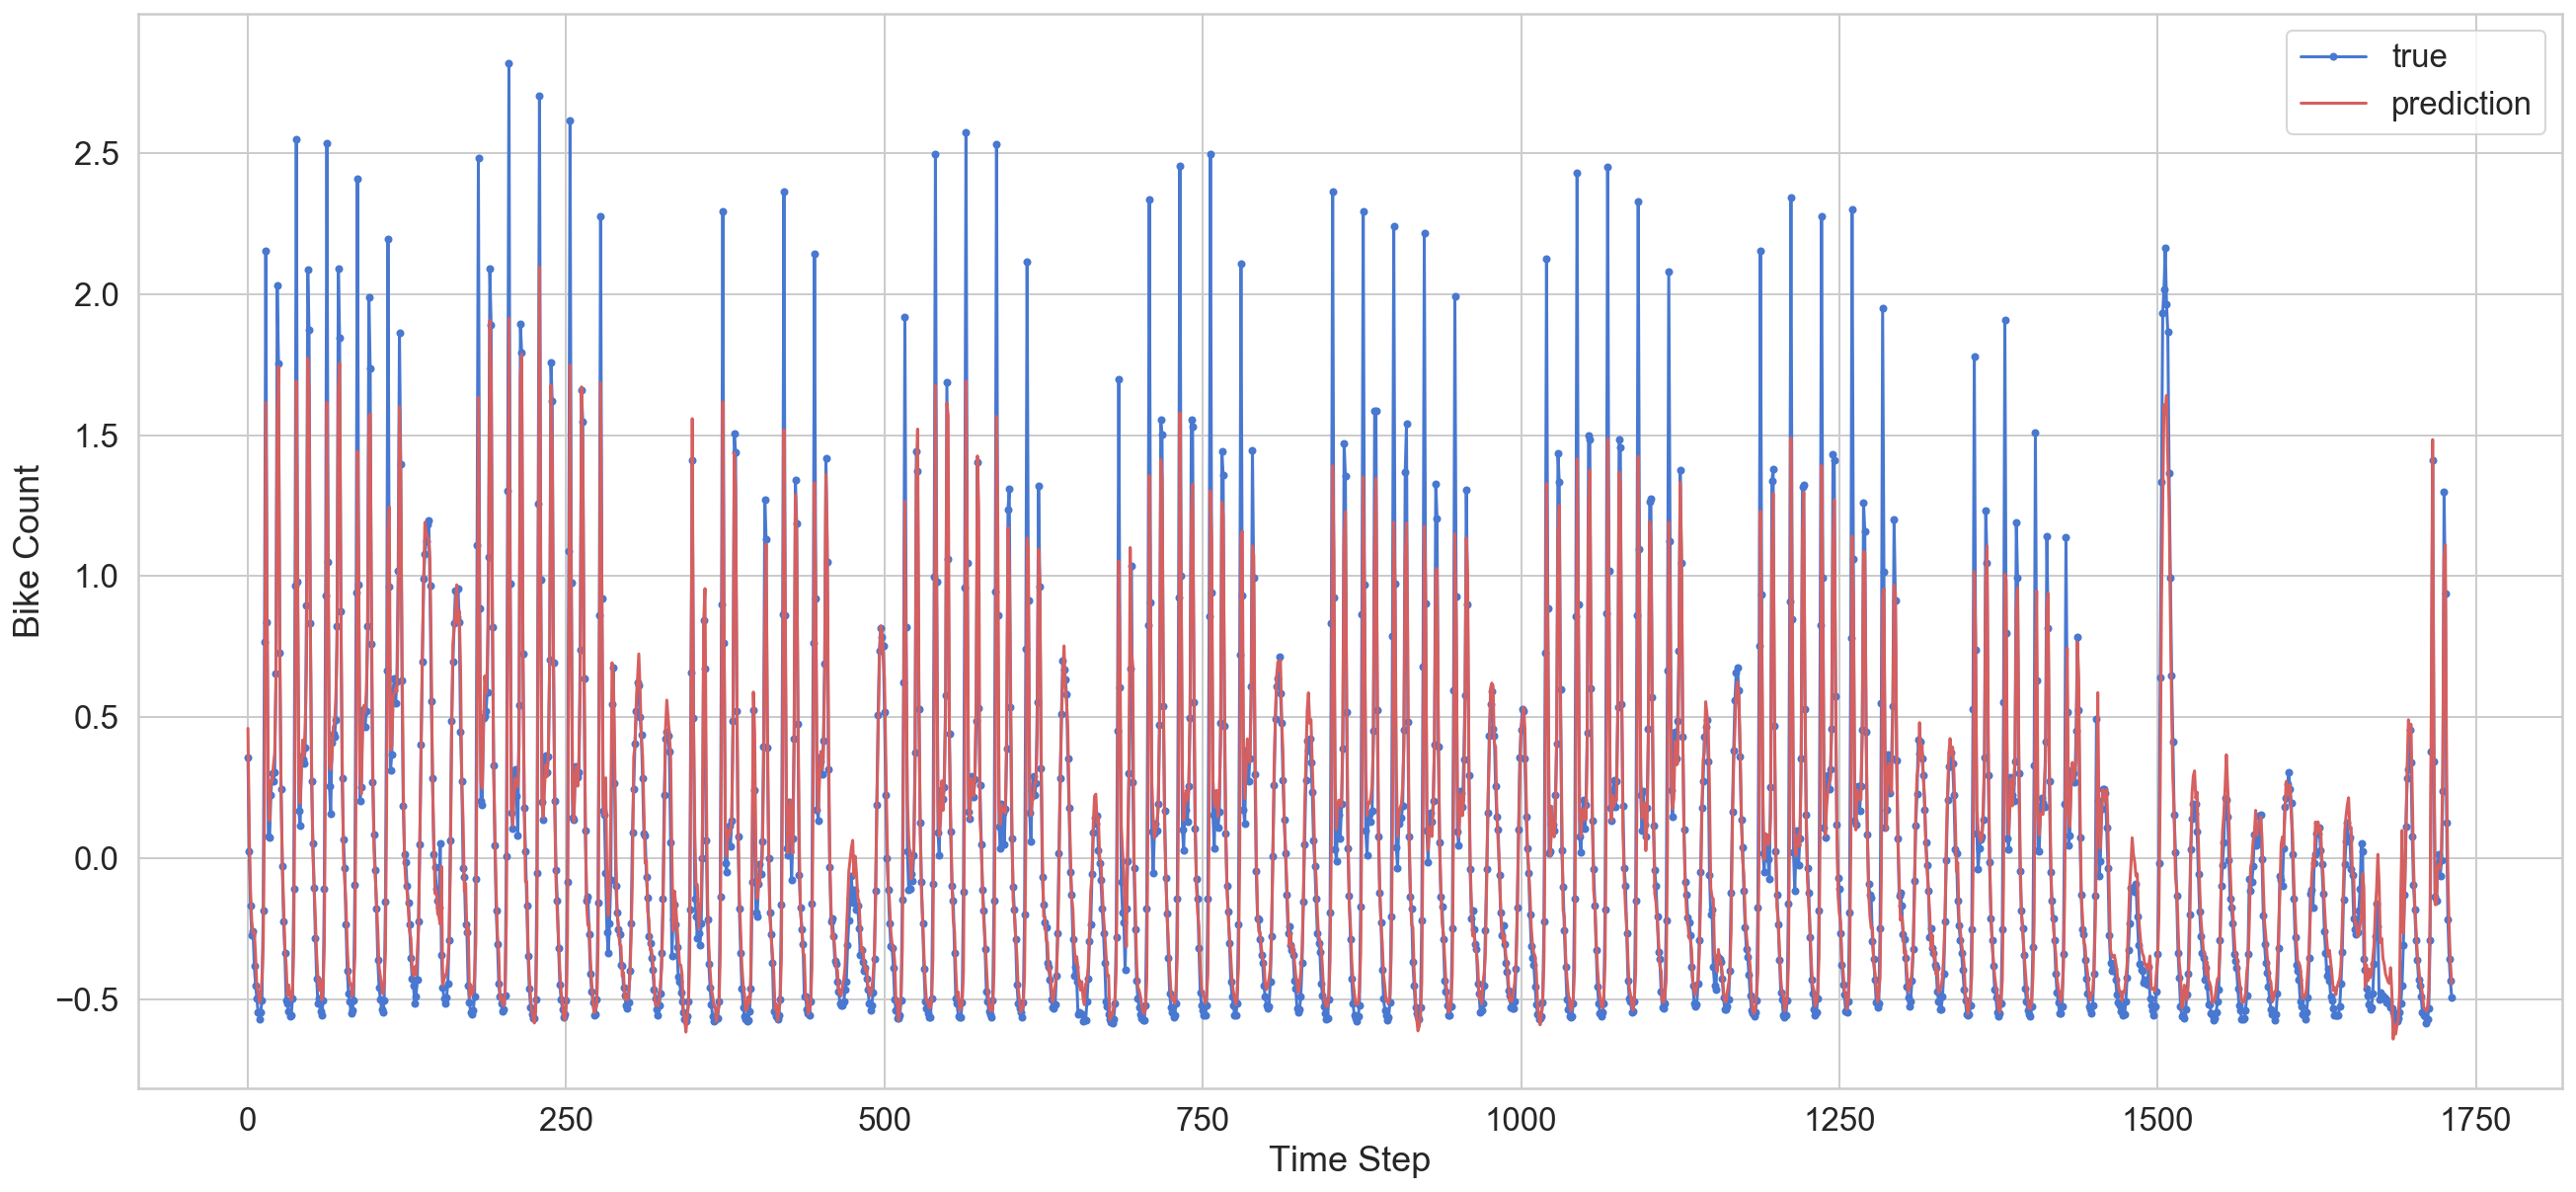

In [95]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [132]:
#trying future dates - Attempting

In [100]:
df2=test[f_columns]

In [101]:
df2

,t1,t2,hum,wind_speed
timestamp,,,,
2016-10-23 08:00:00,-0.6250,-0.571429,0.675,-0.818182
2016-10-23 09:00:00,-0.4375,-0.476190,0.275,-0.454545
2016-10-23 10:00:00,-0.3125,-0.333333,0.025,0.000000
2016-10-23 11:00:00,-0.1250,-0.095238,-0.200,0.636364
2016-10-23 12:00:00,-0.1250,-0.095238,-0.325,0.818182
...,...,...,...,...
2017-01-03 19:00:00,-1.0000,-1.142857,0.375,0.363636
2017-01-03 20:00:00,-1.0000,-1.142857,0.375,0.545455
2017-01-03 21:00:00,-0.9375,-1.095238,0.250,0.818182


In [102]:
from pandas.tseries.offsets import DateOffset
future_dates=[df2.index[-1]+ DateOffset(days=x)for x in range(0,30)]

In [103]:
future_dates

[Timestamp('2017-01-03 23:00:00'),
 Timestamp('2017-01-04 23:00:00'),
 Timestamp('2017-01-05 23:00:00'),
 Timestamp('2017-01-06 23:00:00'),
 Timestamp('2017-01-07 23:00:00'),
 Timestamp('2017-01-08 23:00:00'),
 Timestamp('2017-01-09 23:00:00'),
 Timestamp('2017-01-10 23:00:00'),
 Timestamp('2017-01-11 23:00:00'),
 Timestamp('2017-01-12 23:00:00'),
 Timestamp('2017-01-13 23:00:00'),
 Timestamp('2017-01-14 23:00:00'),
 Timestamp('2017-01-15 23:00:00'),
 Timestamp('2017-01-16 23:00:00'),
 Timestamp('2017-01-17 23:00:00'),
 Timestamp('2017-01-18 23:00:00'),
 Timestamp('2017-01-19 23:00:00'),
 Timestamp('2017-01-20 23:00:00'),
 Timestamp('2017-01-21 23:00:00'),
 Timestamp('2017-01-22 23:00:00'),
 Timestamp('2017-01-23 23:00:00'),
 Timestamp('2017-01-24 23:00:00'),
 Timestamp('2017-01-25 23:00:00'),
 Timestamp('2017-01-26 23:00:00'),
 Timestamp('2017-01-27 23:00:00'),
 Timestamp('2017-01-28 23:00:00'),
 Timestamp('2017-01-29 23:00:00'),
 Timestamp('2017-01-30 23:00:00'),
 Timestamp('2017-01-

In [104]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df2.columns)

In [105]:
future_datest_df

,t1,t2,hum,wind_speed
2017-01-04 23:00:00,NaN,NaN,NaN,NaN
2017-01-05 23:00:00,NaN,NaN,NaN,NaN
2017-01-06 23:00:00,NaN,NaN,NaN,NaN
2017-01-07 23:00:00,NaN,NaN,NaN,NaN
2017-01-08 23:00:00,NaN,NaN,NaN,NaN
2017-01-09 23:00:00,NaN,NaN,NaN,NaN
2017-01-10 23:00:00,NaN,NaN,NaN,NaN
2017-01-11 23:00:00,NaN,NaN,NaN,NaN
2017-01-12 23:00:00,NaN,NaN,NaN,NaN
2017-01-13 23:00:00,NaN,NaN,NaN,NaN


In [106]:
future_df=pd.concat([df2,future_datest_df])

In [107]:
future_df

,t1,t2,hum,wind_speed
2016-10-23 08:00:00,-0.6250,-0.571429,0.675,-0.818182
2016-10-23 09:00:00,-0.4375,-0.476190,0.275,-0.454545
2016-10-23 10:00:00,-0.3125,-0.333333,0.025,0.000000
2016-10-23 11:00:00,-0.1250,-0.095238,-0.200,0.636364
2016-10-23 12:00:00,-0.1250,-0.095238,-0.325,0.818182
...,...,...,...,...
2017-01-28 23:00:00,NaN,NaN,NaN,NaN
2017-01-29 23:00:00,NaN,NaN,NaN,NaN
2017-01-30 23:00:00,NaN,NaN,NaN,NaN
2017-01-31 23:00:00,NaN,NaN,NaN,NaN


In [123]:
def create_datasetf(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs)

In [128]:
test.cnt

timestamp
2016-10-23 08:00:00   -0.370523
2016-10-23 09:00:00   -0.077824
2016-10-23 10:00:00    0.345730
2016-10-23 11:00:00    0.718320
2016-10-23 12:00:00    0.901515
                         ...   
2017-01-03 19:00:00    0.127410
2017-01-03 20:00:00   -0.217631
2017-01-03 21:00:00   -0.358127
2017-01-03 22:00:00   -0.435950
2017-01-03 23:00:00   -0.494490
Name: cnt, Length: 1742, dtype: float64

In [129]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

#X_train, y_train = create_dataset(train, train.cnt, time_steps)
Xf_test, yf_test = create_datasetf(future_df, future_df.t1, time_steps)

print(Xf_test.shape, yf_test.shape)

ValueError: too many values to unpack (expected 2)

In [116]:
Xfuture = create_datasetf(future_df, time_steps)

In [119]:
Xfuture.shape

(1761, 10, 4)

In [131]:
#future_pred = model.predict(Xfuture)